**OBLIGATORIO FINAL G448 - Data Wrangling**
<br>**INTEGRANTES:**
<br>
+ Theo Pereira, 5703834-3, theopereira2001@gmail.com
+ Carlos Píriz, 4298784-4, piriz.carlos@gmail.com
+ Gabriel	Better,3138871-2, gabrielbetter@gmail.com

In [2]:
### Importacion de librerias ###

# Sistema
import os

# Tratamiento de datos
import pandas as pd
import numpy as np
import datetime as dt
import math

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import re

# Visualizacion 
import seaborn as sns
import matplotlib as mpl
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from babel.numbers import format_currency
import matplotlib.pyplot as plt
%matplotlib inline

**CONSIGNAS**
<br>
El objetivo general es realizar un análisis exploratorio de los anuncios inmobiliarios de
algunas provincias de la Patagonia Argentina reportados por el portal Airbnb.
<br>
Los datos están conformados por cuatro archivos csv:
+ Neuquen.csv
+ Rio_Negro.csv
+ Chubut.csv
+ Tierra_del_Fuego.csv

**<h1>1. Carga de datos y armado del dataset</h1>**

In [3]:
# Carga de archivos de datos de chubut
df_chubut = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Chubut.csv')
df_chubut["provincia"]="CHUBUT"
df_chubut.sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
213,893001739255966623,Alquilo Hermosa Casa,entire_home,Nuevo,Esquel,-42.909141,-71.293487,"['3 camas', '2 dormitorios', '2,5 baños']",2023-08-21,2023-08-26,NaN,$60 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
65,19876278,Departamento con vista al mar en PLENO centro,entire_home,"5,0 (14)",Puerto Madryn,-42.769350,-65.032880,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-11,2023-07-16,NaN,$45 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
35,23445902,Alojamientos Memorable (Dept 3),entire_home,"4,65 (49)",Trelew,-43.259050,-65.315020,"['4 camas', '2 dormitorios', '1 baño', '1 cama...",2023-07-01,2023-07-06,NaN,$44 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
49,913881680196995887,Euge’s House,entire_home,Nuevo,Puerto Madryn,-42.778357,-65.025101,"['2 camas', '1 dormitorio', '1 baño']",2023-07-05,2023-07-10,NaN,$40 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
57,52968978,Casa de Campo con Tina de agua caliente Trevelin,entire_home,"4,77 (13)",Trevelin,-42.991430,-71.559460,"['4 camas', '2 dormitorios', '1 baño', '1 cama...",2023-08-11,2023-08-16,NaN,$70 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
194,30380680,Casa de Cecilia,private_room,"4,89 (70)",Esquel,-42.914520,-71.316790,"['2 camas', '1 dormitorio', '2 baños compartid...",2023-07-01,2023-07-06,NaN,$40 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
134,38028114,Fuego,entire_home,"4,86 (7)",Trelew,-43.262050,-65.302140,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-08-01,2023-08-07,NaN,$48 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
28,890430561594058377,Amplia casa con estacionamiento,entire_home,Nuevo,Esquel,-42.914878,-71.334675,"['2 camas', '1 dormitorio', '1 baño']",2023-07-01,2023-07-06,NaN,$25 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
42,23411940,Alojamientos Memorable (Dept 2),entire_home,"4,79 (30)",Trelew,-43.259100,-65.313560,"['7 camas', '2 dormitorios', '1 baño', '1 cama...",2023-07-01,2023-07-06,NaN,$44 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
129,883174783781736766,Espacio 2 - Rada Tilly,entire_home,Nuevo,Rada Tilly,-45.925810,-67.575650,"['1 cama', '1 dormitorio', '1 baño']",2023-07-01,2023-07-06,NaN,$52 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT


In [4]:
# Carga de archivos de datos de Neuquen
df_neuquen = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Neuquen.csv')

df_neuquen["provincia"] = "NEUQUEN"

df_neuquen.sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
33,54111994,Hermosa cabaña para descansar Plottier. Neuquen,entire_home,"4,83 (30)",Neuquen,-38.965480,-68.253840,"['5 camas', '2 dormitorios', '1 baño', '1 cama...",2023-07-01,2023-07-06,NaN,$50 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
49,804960727499903237,Babel Soft - Las Violetas,entire_home,"3,33 (3)",Neuquén,-38.943190,-68.050970,"['2 camas', '1 dormitorio', '1 baño', 'Estacio...",2023-07-03,2023-07-08,NaN,$30 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
237,45275721,Casa tipo duplex muy cómoda con patio y parrilla,entire_home,NaN,Neuquén,-38.943420,-68.112970,"['4 camas', '2 dormitorios', '2 baños', '4 cam...",2023-07-28,2023-08-02,NaN,$62 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
80,26037321,"Habitación privada, céntrica y tranquila",private_room,"4,91 (11)",Neuquén,-38.944920,-68.062460,"['1 cama', '3 dormitorios', '2 baños compartid...",2023-07-01,2023-07-06,NaN,$25 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
27,38957425,Excelente dpto. en pleno Centro de Neuquén,entire_home,"4,95 (41)",Neuquén,-38.950760,-68.061620,"['4 camas', '1 dormitorio', '1 ,5 baños', '2 c...",2023-07-01,2023-07-06,NaN,$60 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
201,53105919,CENTRO DE LOFT!! ALTO COMAHUE COMPRAS!!,entire_home,NaN,Neuquén,-38.943040,-68.062740,"['No hay evaluaciones', '2 camas', 'Monoambien...",2023-07-01,2023-07-06,NaN,$20 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
158,53934589,Casa moderna y tranquila en un amplio terreno,entire_home,Nuevo,Cipolletti,-38.904470,-67.994720,"['No hay evaluaciones', '4 camas', '3 dormitor...",2023-07-01,2023-07-06,NaN,$138 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
75,716543413734281131,"Dos habitaciones, casa amplia, jardín y parrilla.",private_room,NaN,Neuquén,-38.952020,-68.076680,"['2 camas', '2 dormitorios', '1 baño privado',...",2023-07-01,2023-07-06,NaN,$22 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
129,823234764183216913,Dpto 1 dorm pleno centro,entire_home,NaN,Neuquén,-38.958634,-68.060566,"['No hay evaluaciones', '1 cama', '1 dormitori...",2023-07-01,2023-07-06,NaN,$32 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
161,28540980,DEPARTAMENTO LIMAY II,entire_home,"5,0 (4)",Neuquén,-38.963220,-68.028590,"['3 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-02,2023-07-07,NaN,$32 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN


In [5]:
# Carga de archivos de datos de Rio Negro
df_rio_negro = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Rio_Negro.csv')

df_rio_negro["provincia"] = "RIO NEGRO"

df_rio_negro.sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
120,18430462,Mono ambiente con vista al lago,entire_home,"4,84 (141)",San Carlos de Bariloche,-41.134650,-71.300010,"['1 cama', 'Monoambiente', '1 baño', 'Wifi', '...",2023-09-21,2023-09-26,NaN,$79 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
147,5837517,Departamento LOS RODODENDROS 2 dormitorios,entire_home,"4,51 (181)",Dina Huapi,-41.077120,-71.175820,"['1 cama', '2 dormitorios', '1 baño', '1 cama ...",2023-08-31,2023-09-05,NaN,$22 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
105,53842341,Casa en Bariloche sobre costa de lago,entire_home,"4,86 (37)",San Carlos de Bariloche,-41.161740,-71.413030,"['3 camas', '3 dormitorios', '3 baños', '1 cam...",2023-09-02,2023-09-07,NaN,$150 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
263,22985648,Casa de montaña c/ vista al lago - Radales,entire_home,"4,95 (60)",San Carlos de Bariloche,-41.075790,-71.464440,"['3 camas', '2 dormitorios', '1 baño', '1 cama...",2023-08-20,2023-08-25,NaN,$109 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
41,13121505,Casa de montaña c/ vista al lago - Cipreses,entire_home,"4,95 (88)",San Carlos de Bariloche,-41.076190,-71.466220,"['3 camas', '2 dormitorios', '1 baño', '1 cama...",2023-09-25,2023-09-30,NaN,$79 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
135,16981044,"""La Encantada"" en Villa los Coihues",entire_home,"4,97 (70)",San Carlos de Bariloche,-41.151740,-71.413450,"['1 baño', '1 cama doble', '2 camas de una pla...",2023-09-05,2023-09-12,NaN,$90 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
178,602017890042571520,Suite con cocina e increíble vista a los cerros,entire_home,"5,0 (30)",La Villa,-40.774208,-71.651749,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$70 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
48,793355312470293540,Cabaña en los kilómetros,entire_home,"4,73 (11)",San Carlos de Bariloche,-41.133160,-71.369120,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-01,2023-07-06,NaN,$64 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
224,32469274,Casa completa. El Halcón\n4 dormitorios,entire_home,"4,86 (14)",Villa La Angostura,-40.778280,-71.613150,"['10 camas', '4 dormitorios', '3 baños', '3 ca...",2023-07-29,2023-08-03,NaN,$350 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
268,41113445,Departamento con increíble vista al lago N Huapi.,entire_home,"4,92 (50)",San Carlos de Bariloche,-41.136540,-71.302360,"['2 camas', '1 dormitorio', '1 ,5 baños', '1 c...",2023-07-01,2023-07-06,NaN,$59 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


In [6]:
# Carga de archivos de datos de Tierra delFuego
df_tierra_del_fuego = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Tierra_del_Fuego.csv')

df_tierra_del_fuego["provincia"] = "TIERRA DEL FUEGO"

df_tierra_del_fuego.sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
264,568003608911978583,Hermoso departamento con vista al canal y montaña,entire_home,NaN,Ushuaia,-54.81398,-68.337660,"['1 cama', 'Monoambiente', '1 baño', 'Wifi', '...",2023-08-15,2023-08-20,NaN,$47 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
19,867591905332634267,Depto céntrico hab privada llave,private_room,"5,0 (3)",Ushuaia,-54.80481,-68.301500,"['1 cama', '1 dormitorio', '1 baño compartido'...",2023-07-09,2023-07-14,NaN,$21 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
229,626675407573680894,Precioso Departamento A,entire_home,"4,85 (26)",Ushuaia,-54.80770,-68.317690,"['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-01,2023-07-06,NaN,$50 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
251,39086940,Sweet Home Depto 3,entire_home,"4,72 (43)",Ushuaia,-54.81902,-68.335560,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-02,2023-07-09,$33 USD,$50 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
185,51106379,Apartamento Downtown: ¡Excelente ubicación!,entire_home,"4,9 (21)",Ushuaia,-54.80339,-68.300060,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$65 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
37,720428719363448238,Tu hogar en el fin del mundo! Ushuaia te espera!,entire_home,"5,0 (17)",Ushuaia,-54.82170,-68.354055,"['3 camas', 'Monoambiente', '1 baño', '2 camas...",2023-07-03,2023-07-08,NaN,$35 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
113,24852036,Mi Casa Es Su Casa,entire_home,"4,2 (20)",Rio Grande,-53.78347,-67.702090,"['4 camas', '2 dormitorios', '1 baño', '4 cama...",2023-07-01,2023-07-06,NaN,$28 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
179,53797805,"Humilde hogar, en el corazón de Ushuaia",entire_home,"4,35 (40)",Ushuaia,-54.81560,-68.326950,"['3 camas', '2 dormitorios', '1 baño', '1 cama...",2023-07-14,2023-07-19,NaN,$23 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
225,40282621,Habitación Privada para 3 personas,private_room,"4,87 (30)",DSB,-54.82024,-68.345740,"['3 camas', '1 dormitorio', '1 baño compartido...",2023-07-07,2023-07-12,NaN,$26 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
138,889733753812060778,Ushuaia Mágica - Ush AustraLis,entire_home,Nuevo,Ushuaia,-54.81189,-68.326950,"['2 camas', 'Monoambiente', '1 baño', 'Wifi', ...",2023-07-09,2023-07-14,NaN,$45 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO


In [7]:
# Verificacion de columnas para concatenar
(df_chubut.columns == df_neuquen.columns) & (df_rio_negro.columns == df_tierra_del_fuego.columns) & (df_chubut.columns == df_tierra_del_fuego.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [8]:
# Concatenacion de los dataframes separados por provincias en un unico archivo
df_alquileres = pd.concat([df_chubut, df_neuquen, df_rio_negro, df_tierra_del_fuego])
df_alquileres.sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
50,822370130203674319,Excelente departamento 4 pax con cochera.,entire_home,"5,0 (7)",Neuquén,-38.94538,-68.06180,"['3 camas', '2 dormitorios', '1 ,5 baños', '1 ...",2023-07-01,2023-07-06,NaN,$85 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
255,791822527552782007,Compras en Dpto Alto Comahue,entire_home,NaN,Neuquén,-38.94328,-68.06473,"['No hay evaluaciones', '3 camas', '2 dormitor...",2023-07-01,2023-07-06,NaN,$59 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
219,29800413,Ruta de la Patagonia cabaña ecologica 40 #1,entire_home,"4,96 (102)",San Martin de los Andes,-40.31272,-71.38069,"['3 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-08-15,2023-08-20,NaN,$44 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
215,623178032761843625,"departamento céntrico, cálido y cómodo.",entire_home,"4,88 (16)",AIU,-54.80360,-68.32132,"['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-09,2023-07-14,NaN,$33 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
150,22759200,Arrayán. Luminoso y acogedor departamento,entire_home,"4,84 (98)",San Carlos de Bariloche,-41.11291,-71.44117,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-09-06,2023-09-11,NaN,$40 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
84,21516164,Departamento sobre ruta 22 Plottier,entire_home,"4,86 (22)",Confluencia,-38.95630,-68.23011,"['3 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$45 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
138,48405176,Casita Container al rio y a 30 min del Mar!,entire_home,"4,68 (25)",Viedma,-40.87009,-62.92096,"['1 cama', '1 dormitorio', '1 baño', 'Estacion...",2023-07-22,2023-07-27,$21 USD,$25 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
243,638425013799679161,Departamento en Ushuaia totalmente equipado.,entire_home,"4,67 (9)",Ushuaia,-54.80890,-68.31947,"['3 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$83 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
97,48039403,Apartment 2 Pax un Condo between hill and lake,entire_home,"4,88 (89)",San Carlos de Bariloche,-41.12422,-71.36680,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-27,2023-08-01,NaN,$110 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
59,17142248,Planta alta VISTAMAR USHUAIA,entire_home,"4,68 (25)",Ushuaia,-54.83910,-68.36986,"['4 camas', '3 dormitorios', '2 baños', '1 cam...",2023-07-01,2023-07-06,$203 USD,$228 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO


In [9]:
# Reseteo del index, permitiendo duplicados porque aun no sabemos si son unicos los valores
# df_alquileres.reset_index(names = 'id_alojamiento', drop=True,inplace=True,allow_duplicates= True)
# df_alquileres.reset_index(names = 'id_alojamiento', drop=True,inplace=True,allow_duplicates= False)
df_alquileres.reset_index(drop=True,inplace=True)

*Verificacion de filas de los dataframes*

In [10]:
# Verificacion de la cantidad de filas de cada dataframe
print("La cantidad de filas del dataframe de Chubut es:"+str(df_chubut.shape[0]))
print("La cantidad de filas del dataframe de Neuquen es:"+str(df_neuquen.shape[0]))
print("La cantidad de filas del dataframe de Rio Negro es:"+str(df_rio_negro.shape[0]))
print("La cantidad de filas del dataframe de Tierra del fuego es:" + str(df_tierra_del_fuego.shape[0]))
print("La cantidad de filas del dataframe unificado de alquileres es:" + str(df_alquileres.shape[0]))


La cantidad de filas del dataframe de Chubut es:270
La cantidad de filas del dataframe de Neuquen es:270
La cantidad de filas del dataframe de Rio Negro es:270
La cantidad de filas del dataframe de Tierra del fuego es:270
La cantidad de filas del dataframe unificado de alquileres es:1080


*Verificacion de las columnas de los dataframes*

In [11]:
# Verificacion de la cantidad de columnas de cada dataframe
print("La cantidad de columnas del dataframe de Chubut es:" +
      str(df_chubut.shape[1]))
print("La cantidad de columnas del dataframe de Neuquen es:" +
      str(df_neuquen.shape[1]))
print("La cantidad de columnas del dataframe de Rio Negro es:" +
      str(df_rio_negro.shape[1]))
print("La cantidad de columnas del dataframe de Tierra del fuego es:" +
      str(df_tierra_del_fuego.shape[1]))
print("La cantidad de columnas del dataframe unificado de alquileres es:" +
      str(df_alquileres.shape[1]))

La cantidad de columnas del dataframe de Chubut es:18
La cantidad de columnas del dataframe de Neuquen es:18
La cantidad de columnas del dataframe de Rio Negro es:18
La cantidad de columnas del dataframe de Tierra del fuego es:18
La cantidad de columnas del dataframe unificado de alquileres es:18


*Verificacion general e inicial del dataframe unificado*

In [12]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1080 non-null   int64  
 1   name              1080 non-null   object 
 2   category          1080 non-null   object 
 3   rating            886 non-null    object 
 4   city              1076 non-null   object 
 5   latitude          1080 non-null   float64
 6   longitude         1080 non-null   float64
 7   characteristics   1080 non-null   object 
 8   check_in          1080 non-null   object 
 9   check_out         1080 non-null   object 
 10  price_discounted  201 non-null    object 
 11  price_original    1080 non-null   object 
 12  price_qualifier   1080 non-null   object 
 13  cant_resultados   1080 non-null   int64  
 14  fecha_scrapping   1080 non-null   object 
 15  fecha_cambio_bna  1080 non-null   object 
 16  cambio_bna        1080 non-null   float64


In [13]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.describe()

,id_alojamiento,latitude,longitude,cant_resultados,cambio_bna
count,1.080000e+03,1080.000000,1080.000000,1080.000000,1080.000000
mean,3.685341e+17,-44.426201,-68.723924,824.500000,239.919355
std,3.903051e+17,6.164758,2.159715,304.115744,0.000000
min,4.468310e+05,-54.844914,-71.688000,298.000000,239.919355
25%,3.529220e+07,-47.854503,-71.310280,824.500000,239.919355
50%,5.408344e+07,-42.003780,-68.305610,1000.000000,239.919355
75%,7.872495e+17,-39.609811,-68.049328,1000.000000,239.919355
max,9.198428e+17,-38.874370,-62.920960,1000.000000,239.919355


In [14]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.duplicated(keep="first").sum()

51

In [15]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.isna().sum()

id_alojamiento        0
name                  0
category              0
rating              194
city                  4
latitude              0
longitude             0
characteristics       0
check_in              0
check_out             0
price_discounted    879
price_original        0
price_qualifier       0
cant_resultados       0
fecha_scrapping       0
fecha_cambio_bna      0
cambio_bna            0
provincia             0
dtype: int64

*Conclusiones iniciales*
<br>
+ El dataframe unificado, coincide en cantidad de filas y columnas correspondientes a los dataframes individuales
+ Debemos de corregir algunos tipos de datos de columnas
+ Tenemos algunas columnas para reescalar
+ Tenemos filas duplicadas para revisar
+ Tenemos valores nulos para revisar, en principio para las columnas rating y price_discounted

**<h1>2. Análisis de duplicados</h1>**

*Analisis y tratamiento de duplicados global*

In [16]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres.duplicated(keep="first").sum()

51

In [17]:
#  Listo los valores duplicados
df_alquileres[df_alquileres.duplicated(keep="first")]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
54,40755147,La Amarilla Casa de Huéspedes (con cocina) Rut...,entire_home,"4,93 (27)",Epuyén,-42.227509,-71.362289,"['2 camas', '1 dormitorio', '1 ,5 baños', '1 c...",2023-07-01,2023-07-06,NaN,$45 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
72,586216477715336949,Encantador dpto. con vista al mar en Puerto Ma...,entire_home,"5,0 (11)",Puerto Madryn,-42.771633,-65.029068,"['3 camas', '2 dormitorios', '2,5 baños', 'Cal...",2023-07-06,2023-07-11,NaN,$131 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
90,37836757,Rincón del Sol,entire_home,"4,4 (5)",Puerto Madryn,-42.751650,-65.053520,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$18 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
113,736253141994173324,Refugio Ciprés con tina de agua caliente,entire_home,"5,0 (4)",Trevelin,-42.968260,-71.601320,"['1 cama', '1 dormitorio', '1 baño', 'Califica...",2023-07-01,2023-07-06,NaN,$45 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
127,21925703,Hermoso Duplex con Patio y Parrilla. (4 pax).,entire_home,"4,81 (74)",Puerto Madryn,-42.787700,-65.023850,"['3 camas', '2 dormitorios', '1 baño', '1 cama...",2023-07-01,2023-07-06,NaN,$57 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
128,644043911246503372,"Los Molles, casa familiar en entorno natural.",entire_home,NaN,Puerto Madryn,-42.735607,-65.100117,"['3 camas', '2 dormitorios', '1 baño']",2023-07-01,2023-07-07,NaN,$28 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
129,883174783781736766,Espacio 2 - Rada Tilly,entire_home,Nuevo,Rada Tilly,-45.925810,-67.575650,"['1 cama', '1 dormitorio', '1 baño']",2023-07-01,2023-07-06,NaN,$52 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
138,53298317,Mar de Olivillos Planta alta,entire_home,"5,0 (12)",Puerto Piramides,-42.569200,-64.273610,"['2 camas', 'Monoambiente', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$75 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
162,31081731,"Domos Puelo, para dos, con jacuzzi",entire_home,"4,98 (40)",Lago Puelo,-42.041570,-71.592370,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-08,2023-07-15,NaN,$67 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
182,50704005,Hostel patagónico con vista 360 de la Cordillera,shared_room,"4,86 (7)",Trevelin,-43.071450,-71.454920,"['20 camas', '4 dormitorios', '3,5 baños compa...",2023-07-01,2023-07-06,NaN,$17 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT


In [18]:
# Elimino los duplicados, que coinciden en toda la fila
df_alquileres.drop_duplicates(keep="first", inplace=True)
df_alquileres.shape

(1029, 18)

*Analisis y tratamiento de duplicados por columna*

+ Columna 1: id_alojamiento

In [19]:
# Busco si hay duplicados
df_alquileres['id_alojamiento'].duplicated(keep='first').sum()

1

In [20]:
# Identifico filas con esos valores duplicados
df_alquileres[df_alquileres['id_alojamiento'].duplicated(keep='first')]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
648,53729814,Pequeña casa,entire_home,"5,0 (36)",San Carlos de Bariloche,-41.14768,-71.31827,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-18,2023-08-23,NaN,$39 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


In [21]:
# Muestro las filas que corresponden a los valores duplicados, todas
df_alquileres[df_alquileres['id_alojamiento'] == 53729814]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
647,53729814,Pequeña casa,entire_home,"5,0 (36)",San Carlos de Bariloche,-41.14768,-71.31827,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-18,2023-08-23,NaN,$39 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
648,53729814,Pequeña casa,entire_home,"5,0 (36)",San Carlos de Bariloche,-41.14768,-71.31827,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-18,2023-08-23,NaN,$39 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


-> Analisis de los valores de las filas duplicadas.

In [22]:
#Verificamos los valores 
df_alquileres.loc[647]

id_alojamiento                                               53729814
name                                                     Pequeña casa
category                                                  entire_home
rating                                                       5,0 (36)
city                                          San Carlos de Bariloche
latitude                                                    -41.14768
longitude                                                   -71.31827
characteristics     ['1 cama', '1 dormitorio', '1 baño', '1 cama d...
check_in                                                   2023-08-18
check_out                                                  2023-08-23
price_discounted                                                  NaN
price_original                                                $39 USD
price_qualifier                                                 noche
cant_resultados                                                  1000
fecha_scrapping     

In [23]:
# Verificamos los valores
df_alquileres.loc[648]

id_alojamiento                                               53729814
name                                                     Pequeña casa
category                                                  entire_home
rating                                                       5,0 (36)
city                                          San Carlos de Bariloche
latitude                                                    -41.14768
longitude                                                   -71.31827
characteristics     ['1 cama', '1 dormitorio', '1 baño', '1 cama d...
check_in                                                   2023-08-18
check_out                                                  2023-08-23
price_discounted                                                  NaN
price_original                                                $39 USD
price_qualifier                                                 noche
cant_resultados                                                  1000
fecha_scrapping     

In [24]:
# Verificamos los valores para la variable que tendria fiferencia
df_alquileres.loc[647]["characteristics"]

"['1 cama', '1 dormitorio', '1 baño', '1 cama doble', 'Estacionamiento gratis', 'Wifi']"

In [25]:
# Verificamos los valores para la variable que tendria fiferencia
df_alquileres.loc[648]["characteristics"]

"['1 cama', '1 dormitorio', '1 baño', '1 cama doble', 'Estacionamiento gratis', 'Wifi', 'Calificado con 5 de 5 en limpieza']"

*ACCION:*
<BR>
*Vemos que seria el mismo registro con excepcion de la serie characteristics, donde tiene agregada comentario de calificacion*
<br>
*Como consideramos que cada valor de id_alojamiento, deberia ser unico, eliminamos el que consideramos repetido y menos se adecua a los valores esperados por serie*

In [26]:
# Descartamos el registro que no tiene agregado el comentario de la calificacion
df_alquileres.drop([648], inplace=True)
df_alquileres[df_alquileres['id_alojamiento'] == 53729814]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
647,53729814,Pequeña casa,entire_home,"5,0 (36)",San Carlos de Bariloche,-41.14768,-71.31827,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-18,2023-08-23,NaN,$39 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


+ Columna 2: name

In [27]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres['name'].duplicated(keep="first").sum()

1

In [28]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres[df_alquileres['name'].duplicated(keep="first")]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
794,800041160997364459,Vista al Lago en el Bosque - Hab Compartida,shared_room,"5,0 (8)",San Carlos de Bariloche,-41.1333,-71.36914,"['1 cama', '1 dormitorio', '1 baño compartido'...",2023-07-05,2023-07-10,NaN,$23 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


In [29]:
df_alquileres[df_alquileres['name'].str.contains('Vista al Lago en el Bosque - Hab Compartida')]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
712,797077259992479162,Vista al Lago en el Bosque - Hab Compartida,shared_room,"5,0 (8)",San Carlos de Bariloche,-41.13455,-71.36807,"['1 cama', '1 dormitorio', '1 baño compartido'...",2023-07-11,2023-07-18,NaN,$21 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
794,800041160997364459,Vista al Lago en el Bosque - Hab Compartida,shared_room,"5,0 (8)",San Carlos de Bariloche,-41.13330,-71.36914,"['1 cama', '1 dormitorio', '1 baño compartido'...",2023-07-05,2023-07-10,NaN,$23 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


*ACCION:*
<br>
*En este caso vemos que los nombre coinciden pero, pueden corresponder a diferentes lugares, de hecho, estan sobre diferentes calles, segun sus coordenadas.*
<br>
*Por tal motivo los dejamos a ambos registros*

+ Columna 3: category

In [30]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres['category'].duplicated(keep="first").sum()

1025

In [31]:
# Listo los duplicados segun category
df_alquileres[df_alquileres['category'].duplicated(keep="first")].sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
289,879948368648157764,"Casa moderna, céntrica, grande y con cochera.",entire_home,"5,0 (11)",Cipolletti,-38.938280,-67.984790,"['3 camas', '2 dormitorios', '1 baño', '1 cama...",2023-07-02,2023-07-07,NaN,$49 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
918,690079305582856724,Hermoso departamento con parrilla. Con ascensor,entire_home,"4,86 (14)",Ushuaia,-54.829140,-68.355020,"['1 cama', '1 dormitorio', '1 ,5 baños', '1 ca...",2023-07-01,2023-07-06,NaN,$55 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
625,53320962,Luminoso Departamento en Bariloche.,entire_home,"4,97 (72)",San Carlos de Bariloche,-41.136970,-71.299100,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-09-29,2023-10-04,NaN,$42 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
273,716439197957114546,Hermoso departamento de un dormitorio en Neuquén,entire_home,"4,97 (32)",Neuquén,-38.947662,-68.060772,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$49 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
856,24851987,Carabelli Departamento Centrico,entire_home,"4,5 (6)",Rio Grande,-53.785830,-67.700520,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-01,2023-07-07,NaN,$44 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1041,762278401905316378,SuperB Apart: gran vista de Beagle,entire_home,"4,78 (18)",Ushuaia,-54.808810,-68.320620,"['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-29,2023-08-03,NaN,$70 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
139,50705774,Acogedora casa con pileta climatizada cubierta,entire_home,"4,83 (6)",Puerto Madryn,-42.819030,-65.030020,"['7 camas', '3 dormitorios', '3 baños', '2 cam...",2023-07-10,2023-07-15,NaN,$142 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
175,881239031409741069,Paraiso único frente el mar,entire_home,Nuevo,Playa Magagna,-43.385146,-65.045125,"['4 camas', '1 dormitorio', '1 baño']",2023-07-01,2023-07-06,$79 USD,$99 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
966,23973958,"La mejor ubicación en el centro de Ushuaia, pi...",entire_home,"5,0 (149)",Ushuaia,-54.804787,-68.303040,"['2 camas', 'Monoambiente', '1 baño', 'Wifi', ...",2023-09-15,2023-09-20,NaN,$63 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
808,41113445,Departamento con increíble vista al lago N Huapi.,entire_home,"4,92 (50)",San Carlos de Bariloche,-41.136540,-71.302360,"['2 camas', '1 dormitorio', '1 ,5 baños', '1 c...",2023-07-01,2023-07-06,NaN,$59 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


*ACCION:*
<br>
*Entendemos que los valores de categoria se pueden repetir para los diferentes alquileres*
<br>
*por lo cual, no realizamos ninguna accion en base a esta columna*

+ Columna 4: rating

In [32]:
# Verifico los duplicado
df_alquileres['rating'].duplicated(keep="first").sum()

564

In [33]:
# Listamos algunas filas, repetidas por rating
df_alquileres[df_alquileres['rating'].duplicated(keep="first")].sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
294,803657303081651211,Un oasis en Neuquén Capital,entire_home,"5,0 (3)",Neuquén,-38.940095,-68.074063,"['5 camas', '3 dormitorios', '2,5 baños', '1 c...",2023-07-01,2023-07-06,$70 USD,$98 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
267,826285453817276970,Moderno depto con vista al mar,entire_home,NaN,Comodoro Rivadavia,-45.864460,-67.490580,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$79 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
537,53104799,EXCEPCIONAL ALTO COMAHUE SHOPPING! Dpto 2 dorm!,entire_home,NaN,Neuquén,-38.941600,-68.063710,"['No hay evaluaciones', '4 camas', '2 dormitor...",2023-07-01,2023-07-06,NaN,$36 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
674,53779456,Casa de madera con amplio jardín en Circuito C...,entire_home,"4,85 (26)",San Carlos de Bariloche,-41.059230,-71.504460,"['6 camas', '3 dormitorios', '2 baños', 'Estac...",2023-07-24,2023-07-31,NaN,$198 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
301,678310035931171958,Departamento en la costa del río Limay,entire_home,NaN,Neuquén,-38.977510,-68.050250,"['3 camas', '2 dormitorios', '2 baños', '1 cam...",2023-07-05,2023-07-10,NaN,$79 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
145,41171673,Las Condalias - Pto Madryn. Luminoso y tranquilo.,entire_home,"4,79 (14)",Biedma,-42.740400,-65.102580,"['8 camas', '3 dormitorios', '2 baños', '2 cam...",2023-07-01,2023-07-06,NaN,$40 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
51,887762086441997576,Casa Pravia,entire_home,Nuevo,Puerto Madryn,-42.775700,-65.030538,"['6 camas', '2 dormitorios', '2 baños']",2023-07-22,2023-07-27,NaN,$60 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
1007,54301035,Departamento de 2 ambientes -vista al Canal Be...,entire_home,NaN,Ushuaia,-54.793920,-68.275400,"['No hay evaluaciones', '3 camas', '1 dormitor...",2023-07-07,2023-07-13,NaN,$40 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
150,790783682913096478,Dpto Tecka,entire_home,"5,0 (6)",Comodoro Rivadavia,-45.786747,-67.432560,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-07-01,2023-07-06,NaN,$48 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
738,795027372832075610,Habitación en lugar de ensueño,private_room,"5,0 (12)",San Martin de los Andes,-40.117366,-71.245844,"['1 ,5 baños', 'Estacionamiento gratis', 'Wifi...",2023-07-01,2023-07-06,NaN,$37 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


In [34]:
df_alquileres['rating'].unique()

array([nan, '5,0 (6)', '4,91 (70)', 'Nuevo', '4,96 (95)', '4,86 (7)',
       '4,82 (17)', '4,96 (75)', '4,91 (67)', '4,57 (14)', '4,6 (5)',
       '4,94 (18)', '4,95 (22)', '4,92 (64)', '4,94 (109)', '4,77 (44)',
       '4,89 (35)', '5,0 (7)', '4,66 (53)', '5,0 (34)', '4,98 (93)',
       '4,96 (51)', '4,82 (66)', '4,8 (51)', '4,83 (36)', '4,9 (20)',
       '5,0 (17)', '4,65 (49)', '4,7 (33)', '4,89 (9)', '4,97 (90)',
       '5,0 (10)', '4,79 (30)', '4,86 (74)', '4,86 (44)', '4,63 (128)',
       '5,0 (3)', '4,88 (16)', '4,81 (32)', '5,0 (9)', '4,93 (27)',
       '4,92 (13)', '4,5 (4)', '4,77 (13)', '4,67 (12)', '4,9 (176)',
       '4,95 (19)', '4,8 (15)', '5,0 (14)', '4,79 (14)', '5,0 (4)',
       '5,0 (19)', '4,67 (6)', '4,82 (137)', '5,0 (11)', '4,77 (102)',
       '4,47 (55)', '4,76 (134)', '4,74 (19)', '4,96 (27)', '4,91 (11)',
       '4,93 (15)', '4,62 (13)', '4,55 (33)', '4,4 (5)', '4,72 (25)',
       '4,58 (76)', '4,73 (11)', '4,83 (60)', '4,93 (28)', '4,7 (10)',
       '4,76 (85

*ACCION:*
<br>
*Entendemos que los valores de rating se pueden repetir para los diferentes alquileres*
<br>
*Por lo cual, dejamos los registros retpetidos segun esta columna*

+ Columna 5: city

In [35]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres['city'].duplicated(keep="first").sum()

947

In [36]:
# Listamos repetidos, por city
df_alquileres[df_alquileres['city'].duplicated(keep="first")]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,NaN,Puerto Madryn,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,$18 USD,$24 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
2,800749301724167838,Departamento Bella Vista,entire_home,"5,0 (6)",Puerto Madryn,-42.768007,-65.033108,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-01,2023-08-08,NaN,$43 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
3,50769917,New Lil’ & Cozy - 100mts de la playa Puerto Ma...,entire_home,"4,91 (70)",Puerto Madryn,-42.777590,-65.025890,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-09,2023-07-14,NaN,$41 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
4,916738743930751566,Front Beach,entire_home,Nuevo,Puerto Madryn,-42.770540,-65.030810,"['2 camas', 'Monoambiente', '1 baño']",2023-07-01,2023-07-06,NaN,$35 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
5,27877802,Luxury top 11th floor with the best 360 views,entire_home,"4,96 (95)",Puerto Madryn,-42.768330,-65.032100,"['4 camas', '2 dormitorios', '2,5 baños', '1 c...",2023-07-06,2023-07-11,NaN,$122 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,771725397497773450,Casa Fueguina en Centro,entire_home,"4,53 (17)",Ushuaia,-54.803310,-68.302580,"['3 camas', '2 dormitorios', '1 baño', 'Wifi',...",2023-08-14,2023-08-19,$60 USD,$76 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1076,26215568,Hospedaje UshuaiAndo,entire_home,"4,82 (50)",Ushuaia,-54.800790,-68.304230,"['3 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-23,2023-07-28,$45 USD,$50 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1077,42486711,Yeska C Dpto. Supercéntrico. Casco Histórico,entire_home,"4,88 (8)",Ushuaia,-54.805430,-68.308710,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-01,2023-07-06,NaN,$63 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1078,51921207,KREN I,entire_home,"4,85 (26)",Ushuaia,-54.806170,-68.317800,"['2 camas', 'Monoambiente', '1 baño', 'Wifi', ...",2023-07-10,2023-07-15,NaN,$55 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO


*ACCION:*
<br>
*Entendemos que la columna city, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 6: latitude

In [37]:
# Verificamos los duplicados
df_alquileres['latitude'].duplicated(keep="first").sum()

36

In [38]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['latitude'].duplicated(keep="first")].sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
982,690413283545175725,Las Aguilas 3,entire_home,"4,67 (9)",Ushuaia,-54.814922,-68.341647,"['4 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-08,2023-07-14,NaN,$50 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1019,53445794,Departamento con excelente ubicación y vistas,entire_home,"4,91 (22)",Ushuaia,-54.808500,-68.320390,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-06,2023-07-12,NaN,$75 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
791,4469246,Habitación en Casita de madera y adobe. c/desa...,private_room,"4,68 (114)",San Carlos de Bariloche,-41.073160,-71.488690,"['1 cama', '1 dormitorio', '1 baño compartido'...",2023-07-09,2023-07-14,NaN,$40 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
717,49546396,Departamento para 2. Excelente ubicación.,entire_home,"4,89 (53)",San Carlos de Bariloche,-41.134550,-71.299200,"['1 cama', 'Monoambiente', '1 baño', '1 cama q...",2023-07-07,2023-07-13,NaN,$70 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
15,767503846951993933,Brisa de Mar - Puerto Madryn,entire_home,"4,95 (22)",Puerto Madryn,-42.771634,-65.029071,"['3 camas', '2 dormitorios', '2,5 baños', 'Cal...",2023-08-07,2023-08-12,$34 USD,$48 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
516,758292279446313137,Departamento un dormitorio en Complejo con Pis...,entire_home,NaN,Neuquén,-38.949740,-68.043820,"['No hay evaluaciones', '1 cama', '1 dormitori...",2023-07-01,2023-07-06,NaN,$77 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
1024,906355891628807276,Grand House,entire_home,Nuevo,Ushuaia,-54.806780,-68.315870,"['5 camas', '2 dormitorios', '2 baños', 'Wifi'...",2023-07-03,2023-07-09,$140 USD,$175 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
109,905128221670422939,Habitación con Altillo para 4 Pa,private_room,Nuevo,Puerto Madryn,-42.755600,-65.037001,"['3 camas', '1 dormitorio', '1 baño compartido']",2023-07-01,2023-07-06,$14 USD,$17 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
1031,711709136406452484,F) Cama en cuarto mixto compartido,shared_room,"4,67 (9)",Ushuaia,-54.796494,-68.298038,"['1 cama', '1 dormitorio', '1,5 baños comparti...",2023-07-01,2023-07-06,NaN,$12 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
427,651446721456756885,Depto hermoso con estacionamiento incluido.,entire_home,"4,83 (6)",Neuquén,-38.949400,-68.052530,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$59 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN


In [39]:
# Vemos un ejemplo
df_alquileres[df_alquileres['latitude'] == -54.803600]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
934,31825003,Departamento con inmejorable ubicación en Ushuaia,entire_home,"4,9 (108)",Ushuaia,-54.8036,-68.30374,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$85 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1025,623178032761843625,"departamento céntrico, cálido y cómodo.",entire_home,"4,88 (16)",AIU,-54.8036,-68.32132,"['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-09,2023-07-14,NaN,$33 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO


*ACCION:*
<br>
*Entendemos que la columna latitude, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 7: longitude

In [40]:
# Verificamos los duplicados
df_alquileres['longitude'].duplicated(keep="first").sum()

20

In [41]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['longitude'].duplicated(keep="first")].sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
1058,562143078127144674,Turquesa,entire_home,NaN,Ushuaia,-54.807163,-68.318520,"['1 cama', 'Monoambiente', '1 baño', 'Wifi', '...",2023-07-04,2023-07-11,$58 USD,$64 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
976,48043650,Latitud Sur Ushuaia,entire_home,"4,95 (22)",Ushuaia,-54.810780,-68.327640,"['2 camas', 'Monoambiente', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$59 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
527,32223913,Mono-Leloir AMUEBLADOS COMAHUE,entire_home,NaN,Neuquén,-38.941620,-68.056090,"['2 camas', 'Monoambiente', '0 baños', '1 sofá...",2023-07-01,2023-07-06,NaN,$53 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
1071,700712866756917764,D) Cuarto doble privado,private_room,"4,85 (13)",Ushuaia,-54.796494,-68.298038,"['2 camas', '1 dormitorio', '1,5 baños compart...",2023-07-01,2023-07-06,NaN,$26 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1031,711709136406452484,F) Cama en cuarto mixto compartido,shared_room,"4,67 (9)",Ushuaia,-54.796494,-68.298038,"['1 cama', '1 dormitorio', '1,5 baños comparti...",2023-07-01,2023-07-06,NaN,$12 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
941,53903647,Skyline 4,entire_home,"4,88 (8)",Ushuaia,-54.807163,-68.318520,"['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...",2023-07-04,2023-07-09,$88 USD,$98 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1050,828090107927300389,GRUshuaia,entire_home,NaN,Ushuaia,-54.815088,-68.329166,"['No hay evaluaciones', '1 cama', 'Monoambient...",2023-09-13,2023-09-18,$51 USD,$85 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
905,579038522149900540,Departamento con hermosa vista a la Bahía,entire_home,"4,81 (21)",Ushuaia,-54.807163,-68.318520,"['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-03,2023-07-08,NaN,$77 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
243,909336244153347770,Bella Vista 2,entire_home,Nuevo,Esquel,-42.917491,-71.294685,"['4 camas', '1 dormitorio', '1 baño']",2023-07-01,2023-07-06,$52 USD,$65 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
1044,51921353,KREN II,entire_home,"4,77 (30)",Ushuaia,-54.807290,-68.316100,"['2 camas', 'Monoambiente', '1 baño', 'Wifi', ...",2023-07-01,2023-07-06,NaN,$50 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO


In [42]:
# Vemos un ejemplo
df_alquileres[df_alquileres['longitude'] == -65.029470]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
70,20364091,Departamento Solmar,entire_home,"4,82 (137)",Puerto Madryn,-42.76963,-65.02947,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-10-15,2023-10-20,NaN,$47 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
257,53295849,Preciosa unidad de alquiler de 3 dormitorios e...,entire_home,"4,84 (25)",Puerto Madryn,-42.77073,-65.02947,"['3 camas', '2 dormitorios', '2 baños', '1 cam...",2023-07-03,2023-07-08,NaN,$114 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT


*ACCION:*
<br>
*Entendemos que la columna longitude, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columan 8: characteristics

In [43]:
# Verificamos los duplicados
df_alquileres['characteristics'].duplicated(keep="first").sum()

243

In [44]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['characteristics'].duplicated(
    keep="first")].sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
1037,40341750,ESTUDIO A ESTRENAR PARA DOS PERSONAS/NEW STUDIO!,entire_home,"4,73 (78)",Ushuaia,-54.815690,-68.336540,"['1 cama', 'Monoambiente', '1 baño', '1 cama d...",2023-07-01,2023-07-06,NaN,$56 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
540,602224536421547198,Casa de artista con senderos & arroyo,entire_home,"5,0 (28)",Villa Traful,-40.652940,-71.412080,"['3 camas', '2 dormitorios', '1 baño', '1 cama...",2023-07-04,2023-07-09,NaN,$107 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
28,890430561594058377,Amplia casa con estacionamiento,entire_home,Nuevo,Esquel,-42.914878,-71.334675,"['2 camas', '1 dormitorio', '1 baño']",2023-07-01,2023-07-06,NaN,$25 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
879,775452621588669589,Las Carmelitas 2 Apartamento,entire_home,"4,92 (26)",Ushuaia,-54.814804,-68.326920,"['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...",2023-07-14,2023-07-19,NaN,$58 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
842,17254784,317 Feuerland. Tierra de Fuegos,entire_home,"4,91 (34)",Ushuaia,-54.815191,-68.329141,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-09-21,2023-09-26,NaN,$53 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
873,810966524601056786,Apartamento y spa Ushuaia,entire_home,"4,93 (15)",Ushuaia,-54.793760,-68.234100,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-08-03,2023-08-09,$59 USD,$80 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
480,870770974790974455,Depto 1 Dormitorio Neuquén,entire_home,Nuevo,Neuquén,-38.946465,-68.054645,"['No hay evaluaciones', '1 cama', '1 dormitori...",2023-07-01,2023-07-06,NaN,$68 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
1031,711709136406452484,F) Cama en cuarto mixto compartido,shared_room,"4,67 (9)",Ushuaia,-54.796494,-68.298038,"['1 cama', '1 dormitorio', '1,5 baños comparti...",2023-07-01,2023-07-06,NaN,$12 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
908,829670957208558538,Departamento de Ana y José - 2 personas,entire_home,"5,0 (5)",Ushuaia,-54.803140,-68.316240,"['2 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-08-29,2023-09-03,NaN,$44 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
700,46318875,A LOS PIES DEL ARROYO,entire_home,"4,96 (23)",San Martin de los Andes,-40.135880,-71.284570,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-01,2023-07-06,NaN,$70 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


*ACCION:*
<br>
*Entendemos que la columna characteristics, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 9: check_in

In [45]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['check_in'].duplicated(keep="first").sum()

920

*ACCION:*
<br>
*Entendemos que la columna check_in, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 10: check_out

In [46]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['check_out'].duplicated(keep="first").sum()

916

*ACCION:*
<br>
*Entendemos que la columna check_out, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 11: price_discounted

In [47]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_discounted'].duplicated(keep="first").sum()

938

*ACCION:*
<br>
*Entendemos que la columna price_discounted, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 12: price_original

In [48]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_original'].duplicated(keep="first").sum()

868

*ACCION:*
<br>
*Entendemos que la columna price_original, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 13: price_qualifier

In [49]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_qualifier'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna price_qualifier, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 14: cant_resultados

In [50]:
# Verificamos los duplicados
df_alquileres['cant_resultados'].duplicated(keep="first").sum()

1026

*ACCION:*
<br>
*Entendemos que la columna cant_resultados, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

Columna 15: fecha_scrapping

In [51]:
# Verificamos los duplicados
df_alquileres['fecha_scrapping'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna fecha_scrapping, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 16: fecha_cambio_bna

In [52]:
# Verificamos los duplicados
df_alquileres['fecha_cambio_bna'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna fecha_cambio_bna, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 17: cambio_bna

In [53]:
# Verificamos los duplicados
df_alquileres['cambio_bna'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna cambio_bna, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 18: provincia

In [54]:
# Verificamos los duplicados
df_alquileres['provincia'].duplicated(keep="first").sum()

1024

*ACCION:*
<br>
*Entendemos que la columna provincia, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

*OBSERVACION GENERAL*
<br>
*En general entendemos que la mayoria de las columnas podrian tener valores repetidos evaluandolas individualmente.*
<br>
*Pero si consideramos que la variable id_alojamiento identifica de manera biunivoca un alojamiento.*
<br>
*Podemos decir que no es lo mismo, un duplicado en la columna id_alojamiento(que no deberia tener valores repetidos), que un duplicado en la columna price_original,*
<br>
*(que podria perfectamente tener valores repetidos en la seria).*


**<h1>3. Análisis de datos faltantes y limpieza</h1>**

+ Mostrar el porcentaje de datos faltantes de cada columna

In [55]:
# Verificacion inicial del dataset
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   category          1028 non-null   object 
 3   rating            842 non-null    object 
 4   city              1024 non-null   object 
 5   latitude          1028 non-null   float64
 6   longitude         1028 non-null   float64
 7   characteristics   1028 non-null   object 
 8   check_in          1028 non-null   object 
 9   check_out         1028 non-null   object 
 10  price_discounted  191 non-null    object 
 11  price_original    1028 non-null   object 
 12  price_qualifier   1028 non-null   object 
 13  cant_resultados   1028 non-null   int64  
 14  fecha_scrapping   1028 non-null   object 
 15  fecha_cambio_bna  1028 non-null   object 
 16  cambio_bna        1028 non-null   float64
 17  

*En primera instancia observamos que solo nos quedan dos columnas con datos faltantes: rating y price_discounted*
<br>
*Para rating, tenenmos un 81.90 % de faltantes (842 de 1028).*
<br>
*Para rating, tenenmos un 18.58 % de faltantes (191 de 1028).*


+ ¿Cuáles son las 3 columnas con más datos faltantes?

*En nuestra observacion inicial, en principio tenemos dos columnas con datos faltantes solamente: rating y price_discounted*

**LIMPIEZA DE DE DATOS POR COLUMNAS**

In [56]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   category          1028 non-null   object 
 3   rating            842 non-null    object 
 4   city              1024 non-null   object 
 5   latitude          1028 non-null   float64
 6   longitude         1028 non-null   float64
 7   characteristics   1028 non-null   object 
 8   check_in          1028 non-null   object 
 9   check_out         1028 non-null   object 
 10  price_discounted  191 non-null    object 
 11  price_original    1028 non-null   object 
 12  price_qualifier   1028 non-null   object 
 13  cant_resultados   1028 non-null   int64  
 14  fecha_scrapping   1028 non-null   object 
 15  fecha_cambio_bna  1028 non-null   object 
 16  cambio_bna        1028 non-null   float64
 17  

+ Columna 0: id_alojamiento

In [57]:
df_alquileres['id_alojamiento'].nunique()

1028

In [58]:
df_alquileres['id_alojamiento'].isna().sum()

0

+ Columna 1: name

In [59]:
sorted(df_alquileres['name'].unique())

['"Alegria" vistas de ensueño en un lugar para enamorarse',
 '"Bathroom with LakeView Place and Retreat"',
 '"Casita" a estrenar, 21 m2 de luz',
 '"Cerros Nevados" departamento tipo loft.',
 '"Cipresales"     Cabaña  Villa la Angostura  Nqn',
 '"Doña Cota" - Amueblados Comahue',
 '"El Rancho" Sentirte en casa',
 '"La Encantada" en Villa los Coihues',
 '"La Posadita" Casa de Montaña, Miralejos',
 '"La casa de Cielo "',
 '"Los Amancays "\nCabaña de montaña',
 '"Tiny House de Ensueño"',
 '"Ty Bychan" \nLa Casita. Entre raíces galesas.',
 '0 - Pura Tranquilidad en el Corazón de Neuquén',
 '1- Pura Tranquilidad en el Corazón de Neuquén',
 '11-E Espectacular departamento Alto Neuquen',
 '2 - Pura tranquilidad en el corazón de Neuquén',
 '2 Amigos de viaje en un lugar comodo',
 '2 Habitaciones. 4 Personas en Casa con Pileta',
 '2 Personas. Lugar súper cómodo',
 '2 ambientes en el centro',
 '2x1 Central Family',
 '3 dormitorios. cama matrimonial + 3 de una plaza',
 '3- Pura tranquilidad en el 

+ Columna 2: category

In [60]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['category'].unique()

array(['entire_home', 'private_room', 'shared_room'], dtype=object)

In [61]:
# Verificamos que no tienen  na
df_alquileres['category'].isna().sum()

0

In [62]:
# Cambiamos el tipo de la serie
df_alquileres['category'] = df_alquileres['category'].astype('category')

+ Columna 3: rating

In [63]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['rating'].unique()

array([nan, '5,0 (6)', '4,91 (70)', 'Nuevo', '4,96 (95)', '4,86 (7)',
       '4,82 (17)', '4,96 (75)', '4,91 (67)', '4,57 (14)', '4,6 (5)',
       '4,94 (18)', '4,95 (22)', '4,92 (64)', '4,94 (109)', '4,77 (44)',
       '4,89 (35)', '5,0 (7)', '4,66 (53)', '5,0 (34)', '4,98 (93)',
       '4,96 (51)', '4,82 (66)', '4,8 (51)', '4,83 (36)', '4,9 (20)',
       '5,0 (17)', '4,65 (49)', '4,7 (33)', '4,89 (9)', '4,97 (90)',
       '5,0 (10)', '4,79 (30)', '4,86 (74)', '4,86 (44)', '4,63 (128)',
       '5,0 (3)', '4,88 (16)', '4,81 (32)', '5,0 (9)', '4,93 (27)',
       '4,92 (13)', '4,5 (4)', '4,77 (13)', '4,67 (12)', '4,9 (176)',
       '4,95 (19)', '4,8 (15)', '5,0 (14)', '4,79 (14)', '5,0 (4)',
       '5,0 (19)', '4,67 (6)', '4,82 (137)', '5,0 (11)', '4,77 (102)',
       '4,47 (55)', '4,76 (134)', '4,74 (19)', '4,96 (27)', '4,91 (11)',
       '4,93 (15)', '4,62 (13)', '4,55 (33)', '4,4 (5)', '4,72 (25)',
       '4,58 (76)', '4,73 (11)', '4,83 (60)', '4,93 (28)', '4,7 (10)',
       '4,76 (85

In [64]:
# Observamos que existen valores na y uno que seria "Nuevo"
# Reemplazamos el valor Nuevo por na
mask = df_alquileres['rating'].str.lower().str.contains('nuevo', na = False)
df_alquileres.loc[mask, 'rating'] = np.NaN

In [65]:
# Tratamiento de la columna rating
# Separamos los valores correspondientes para limpiarlos
df_rating= df_alquileres['rating'].str.split(pat="[ ]",expand=True).add_prefix('Columna')
# Renombramos las columnas
df_rating.rename(columns={"Columna0": "rating", "Columna1": "votaciones"}, inplace=True)

In [66]:
# Limpiamos los valores para la columna rating
df_rating['rating'] = df_rating['rating'].replace(',','.')

In [67]:
# Reemplazamos la columna por punto para la columna rating y lo cambiamos de tipo
df_rating['rating'] = df_rating['rating'].str.replace(',', '.')
df_rating['rating'] = df_rating['rating'].astype('float64')

In [68]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      726 non-null    float64
 1   votaciones  726 non-null    object 
dtypes: float64(1), object(1)
memory usage: 24.1+ KB


In [69]:
# Limpiamos la columna de votaciones para cambiarle el tipo
df_rating['votaciones'] = df_rating['votaciones'].str.replace('(', '').str.replace(')', '')
df_rating['votaciones'] = np.floor(pd.to_numeric(df_rating['votaciones'], errors='coerce')).astype('Int64')


In [70]:
#  Rellenamos los valores para las columnas rating y votaciones
# Rellenamos con un valor promedio, pero establecemos que no tiene votaciones
media_rating = df_rating['rating'].mean()
media_votaciones = np.floor(df_rating['votaciones'].mean())
df_rating.fillna({'rating':media_rating,'votaciones':media_votaciones},inplace= True)


In [71]:
# Enriquecemos el dataframe de alquileres con las columnas de rating y votaciones
df_alquileres= df_alquileres.merge(df_rating,how='left',left_index=True,right_index=True,suffixes=('', '_y'))
df_alquileres[['rating_y','votaciones']].head()


,rating_y,votaciones
0,4.846171,44
1,4.846171,44
2,5.000000,6
3,4.910000,70
4,4.846171,44


In [72]:
# Actualizamos las columnas del dataframe rating y votaciones
df_alquileres['rating']= df_alquileres['rating_y']
df_alquileres = df_alquileres.drop('rating_y',axis=1)
df_alquileres.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id_alojamiento    1028 non-null   int64   
 1   name              1028 non-null   object  
 2   category          1028 non-null   category
 3   rating            1028 non-null   float64 
 4   city              1024 non-null   object  
 5   latitude          1028 non-null   float64 
 6   longitude         1028 non-null   float64 
 7   characteristics   1028 non-null   object  
 8   check_in          1028 non-null   object  
 9   check_out         1028 non-null   object  
 10  price_discounted  191 non-null    object  
 11  price_original    1028 non-null   object  
 12  price_qualifier   1028 non-null   object  
 13  cant_resultados   1028 non-null   int64   
 14  fecha_scrapping   1028 non-null   object  
 15  fecha_cambio_bna  1028 non-null   object  
 16  cambio_bna        1028 non-nu

+ Agregamos la columna: best_reviews

In [73]:
df_alquileres['best_reviews'] = np.where(df_alquileres['rating']==5.0,True,False)
df_alquileres.sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia,votaciones,best_reviews
683,599328787884286084,Blues céntrico,entire_home,5.000000,San Carlos de Bariloche,-41.133860,-71.308370,"['1 baño', '1 cama queen', '2 camas de una pla...",2023-09-02,2023-09-08,$180 USD,$200 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO,53,True
256,53308828,Lo de Gustavo Villa Ayelen,entire_home,4.846171,Esquel,-42.918510,-71.355190,"['5 camas', '2 dormitorios', '2,5 baños']",2023-07-01,2023-07-06,NaN,$115 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False
830,34895919,Un Chiringo entre el bosque y la montaña.,entire_home,4.920000,Ushuaia,-54.797010,-68.299720,"['4 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-08-08,2023-08-13,NaN,$55 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO,157,False
938,865289942925242813,Abrazando el mar,entire_home,4.846171,Río Grande,-53.757460,-67.726520,"['No hay evaluaciones', '3 camas', '3 dormitor...",2023-07-01,2023-07-06,NaN,$82 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO,44,False
50,649964570123438789,Trelew Apart 1,entire_home,4.810000,Trelew,-43.255662,-65.311438,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-07-15,2023-07-20,NaN,$35 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,32,False
38,782776475232656991,Departamento para 3 personas!,entire_home,4.570000,Esquel,-42.910530,-71.307150,"['2 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-11,2023-08-16,NaN,$29 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,14,False
355,858520971532062848,Plaza Caviahue Apartment II NQN,entire_home,4.846171,Neuquén,-38.943380,-68.056220,"['No hay evaluaciones', '4 camas', '1 dormitor...",2023-07-03,2023-07-10,$47 USD,$59 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN,44,False
669,16563321,Acogedora cabaña en el lago,entire_home,4.900000,"San Carlos de Bariloche, Río Negro, AR",-41.070180,-71.490940,"['1 cama', '1 dormitorio', '1 cama doble', 'Es...",2023-07-15,2023-07-20,NaN,$80 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO,134,False
896,27873947,Ushuaia Goleta,entire_home,4.960000,Ushuaia,-54.811920,-68.324240,"['5 camas', '3 dormitorios', '2,5 baños', '1 c...",2023-10-17,2023-10-22,NaN,$150 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO,156,False
950,823911798451979776,Patagonia Australia,entire_home,4.920000,Ushuaia,-54.817210,-68.329010,"['1 cama', '1 dormitorio', '1 ,5 baños', '1 ca...",2023-07-01,2023-07-06,NaN,$50 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO,13,False


In [74]:
# Porcentaje de moejores reviews
mejores = df_alquileres[df_alquileres["best_reviews"]]['best_reviews'].count()
no_mejores = df_alquileres[~df_alquileres["best_reviews"]]['best_reviews'].count()
porc = mejores /(mejores+no_mejores)*100
print(f"La cantidad de mejores reseñas es de :{mejores} y corresponde a un {porc} %.")

La cantidad de mejores reseñas es de :161 y corresponde a un 15.66147859922179 %.


+ Columna 4: city

In [75]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['city'].unique()

array(['Puerto Madryn', 'Comodoro Rivadavia', 'Trelew', 'Esquel',
       'Puerto Piramides', 'Puerto Pirámides', 'Trevelin', 'Cholila',
       'Epuyén', 'Playa Unión', 'Lago Puelo', 'Playa Union', 'Rada Tilly',
       'Rawson', 'Biedma', 'Esquel,', 'Gaiman', 'El Hoyo', 'Cushamen',
       'Playa Magagna', 'Camarones', 'Biedma Department',
       'Gobernador Costa', 'Corcovado, Chubut', 'Neuquén', 'Neuquen',
       'BVH', 'Cipolletti', 'MDJ', 'Plottier', 'Confluencia',
       'Centenario', nan, 'Q8302ATE', 'JKB', 'Las Perlas', 'KCN',
       'Q8300MDJ', 'Confluencia Department', 'San Martín de Los Andes',
       'BGJ', 'Villa Traful', 'Villa La Angostura',
       'San Carlos de Bariloche', 'Bariloche', 'San Martin de los Andes',
       'Dina Huapi', 'Lácar', 'San Martín de los Andes', 'La Villa',
       'San Carlos de Bariloche-  Península de San Pedro',
       'Villa la Angostura ', 'Los Lagos', 'Puerto Manzano', 'Bariloche ',
       'San Carlos de Bariloche, Río Negro, AR', 'Viedma',
  

In [76]:
# Como vemos que varias ciudades son la misma pero con alguna diferencia tipografica, tratamos de normalizar los valores
df_alquileres['city'] = df_alquileres['city'].str.strip().str.upper()
df_alquileres.head()

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia,votaciones,best_reviews
0,855050336912355203,North Beach,entire_home,4.846171,PUERTO MADRYN,-42.756301,-65.037517,"['2 camas', '1 dormitorio', '1 baño']",2023-07-06,2023-07-12,NaN,$38 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,4.846171,PUERTO MADRYN,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,$18 USD,$24 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False
2,800749301724167838,Departamento Bella Vista,entire_home,5.000000,PUERTO MADRYN,-42.768007,-65.033108,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-01,2023-08-08,NaN,$43 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,6,True
3,50769917,New Lil’ & Cozy - 100mts de la playa Puerto Ma...,entire_home,4.910000,PUERTO MADRYN,-42.777590,-65.025890,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-09,2023-07-14,NaN,$41 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,70,False
4,916738743930751566,Front Beach,entire_home,4.846171,PUERTO MADRYN,-42.770540,-65.030810,"['2 camas', 'Monoambiente', '1 baño']",2023-07-01,2023-07-06,NaN,$35 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False


In [77]:
# Quitamos los tildes
df_alquileres['city'] = df_alquileres['city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_alquileres.head()

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia,votaciones,best_reviews
0,855050336912355203,North Beach,entire_home,4.846171,PUERTO MADRYN,-42.756301,-65.037517,"['2 camas', '1 dormitorio', '1 baño']",2023-07-06,2023-07-12,NaN,$38 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,4.846171,PUERTO MADRYN,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,$18 USD,$24 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False
2,800749301724167838,Departamento Bella Vista,entire_home,5.000000,PUERTO MADRYN,-42.768007,-65.033108,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-01,2023-08-08,NaN,$43 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,6,True
3,50769917,New Lil’ & Cozy - 100mts de la playa Puerto Ma...,entire_home,4.910000,PUERTO MADRYN,-42.777590,-65.025890,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-09,2023-07-14,NaN,$41 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,70,False
4,916738743930751566,Front Beach,entire_home,4.846171,PUERTO MADRYN,-42.770540,-65.030810,"['2 camas', 'Monoambiente', '1 baño']",2023-07-01,2023-07-06,NaN,$35 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False


In [78]:
# Recopilamos los datos de ciudades que tienen lugeres turisicos, segun la provincia, para tratar de agruparlas
aux_ciudades = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Provincias_Ciudades.csv',sep= ';',encoding='latin1')
aux_ciudades['ciudad'] = aux_ciudades['ciudad'].str.upper().str.strip()
aux_ciudades['ciudad'] = aux_ciudades['ciudad'].str.normalize(
    'NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
aux_ciudades.head()

,ciudad,provincia
0,ALTO RIO SENGUER,CHUBUT
1,BAHIA BUSTAMANTE,CHUBUT
2,CAMARONES,CHUBUT
3,CHOLILA,CHUBUT
4,COMODORO RIVADAVIA,CHUBUT


In [79]:
# Creamos una columna city2, que va a a guardar los valores resultantes para city
df_alquileres['city2'] = df_alquileres['city']


# Parametros para los cuales buscar la mejor aproximacion por fuzzy
provincias = ['TIERRA DEL FUEGO', 'NEUQUEN', 'RIO NEGRO', 'CHUBUT']
# Valres de match que aceptamos
aprobaciones = [80, 80, 80, 80]

# rr=0;
# iter=0
# Iteramos por indice, para provincias y aprobaciones
for indice in range((len(provincias))):
    # Iteramos  por cada ciudad segun la provincia
    for _, row in df_alquileres.loc[df_alquileres['provincia']==provincias[indice]].iterrows():
        ciudad_probar = str(row['city'])
        #aloj=-1
        #iter+=1
        max_coincidencia=0
        encontro = False
        # Recorremos la lista de ciudades de la provincia recabados para verificar
        for valor_correcto in aux_ciudades.loc[aux_ciudades['provincia'] == provincias[indice]]['ciudad']:            
            # Obtenemos el ratio de coincidencia
            coincidencia = fuzz.ratio(ciudad_probar, valor_correcto)
            #print(f"Iteraccion: {iter},id_Alojamiento:{row['id_alojamiento']} index: {_} ==== Comparo {ciudad_probar} de {str(row['provincia'])} , con {valor_correcto} de {provincias[indice]}. Resultdo {coincidencia}")
            # Si el puntaje de la coincidencia es mayor que la vigente
            if coincidencia > max_coincidencia:
                # Guardar el valor correcto
                correccion = valor_correcto
                # Reemplazar el puntaje
                max_coincidencia = coincidencia                
                if (coincidencia > max_coincidencia) & (max_coincidencia >= aprobaciones[indice]):
                    # Guardar el valor correcto
                    correccion = valor_correcto
                    # Reemplazar el puntaje
                    max_coincidencia = coincidencia
                    # Reemplazo por el mejor valor aproximado, en la columna auxiliar
                    df_alquileres['city2']=correccion
                    # Aviso que encontre algo
                    encontro = True
        # Si no encontre una coincidencia suficiente, cambio de macheo
        if( not encontro):
            # Recorremos la lista de departamentos
            max_coincidencia_parcial = 0            
            for valor_correcto_parcial in aux_ciudades.loc[aux_ciudades['provincia'] == provincias[indice]]['ciudad']:
                # Obtenemos el ratio de coincidencia
                coincidencia_parcial = fuzz.partial_ratio(ciudad_probar, valor_correcto_parcial)
                # print(f"Iteraccion: {iter},id_Alojamiento:{row['id_alojamiento']} index: {_} ==== Comparo {ciudad_probar} de {str(row['provincia'])} , con {valor_correcto_parcial} de {provincias[indice]}. Resultdo {coincidencia_parcial}")
                # Si el puntaje de la coincidencia es mayor que la vigente
                if coincidencia_parcial > max_coincidencia_parcial:
                    # Guardar el valor correcto
                    correccion_parcial = valor_correcto_parcial
                    # Reemplazar el puntaje
                    max_coincidencia_parcial = coincidencia_parcial
                    if (coincidencia_parcial > max_coincidencia_parcial) & (max_coincidencia_parcial >= aprobaciones[indice]):
                        # Guardar el valor correcto
                        correccion_parcial = valor_correcto_parcial
                        # Reemplazar el puntaje
                        max_coincidencia_parial = coincidencia_parcial                        
                        # Asigno el mejor valor posible encontrado
                        df_alquileres['city2']=correccion_parcial
                        encontro = True
                        
                        
# En caso de que no se cumpla con las condiciones del macheo, mantiene el valor para ciudad inicial
            

In [80]:
# Tenemos cuatro alojamientos que no tienen ciudad ingresada
df_alquileres['city'].isna().sum()

4

In [81]:
# Consideramos que la ciudad es un dato importante, y por la cantidad la accion a tomar es elimnar esos 4 registros. Pero como en este analisis no require el uso de la columna city. lo dejamos
# df_alquileres.dropna(subset=['city'],inplace= True)

In [82]:
# Asignamos los nuevos valores a city y eliminamos la columna city2
df_alquileres['city']=df_alquileres['city2']
df_alquileres = df_alquileres.drop('city2', axis=1)

In [83]:
df_alquileres.groupby(by='city',observed=True)['city'].count()

city
AIU                                       1
AJK                                       1
AWF                                       2
BARILOCHE                                 4
BAX                                       2
                                         ..
VIEDMA                                    1
VILLA LA ANGOSTURA                       23
VILLA LA ANGOSTURA, NEUQUEN ARGENTINA     1
VILLA LLAO LLAO                           1
VILLA TRAFUL                              3
Name: city, Length: 70, dtype: int64

In [84]:
# Cambiamos el tipo de datos de city
df_alquileres['city'] = df_alquileres['city'].astype('category')

+ Columna 5: latitude

In [85]:
df_alquileres['latitude'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: latitude
Non-Null Count  Dtype  
--------------  -----  
1028 non-null   float64
dtypes: float64(1)
memory usage: 16.1 KB


In [86]:
df_alquileres['latitude'].unique()

array([-42.7563015 , -42.75577473, -42.76800685, -42.77759   ,
       -42.77054   , -42.76833   , -42.78191   , -42.76473   ,
       -42.7716337 , -42.7538    , -42.76864   , -45.81441   ,
       -42.76506   , -42.76887   , -43.25534   , -42.91027   ,
       -42.76985   , -42.767826  , -42.77496   , -45.86703   ,
       -42.56882   , -43.27444   , -43.25614   , -42.77106   ,
       -45.86496   , -42.91138   , -42.77884   , -42.9148784 ,
       -42.9132481 , -42.91526   , -42.9074621 , -42.7687445 ,
       -42.56749   , -43.09089   , -43.25905   , -42.76854884,
       -45.86038   , -42.91053   , -42.772861  , -42.65054   ,
       -42.76724   , -43.2591    , -42.77329   , -42.91809   ,
       -42.92146   , -42.76916   , -42.752541  , -42.5117    ,
       -42.77835745, -43.25566171, -42.7756997 , -42.90797   ,
       -42.22750854, -42.77086   , -42.91956   , -42.99143   ,
       -42.56918   , -42.77094   , -42.57219   , -42.56978   ,
       -43.32639   , -43.25009918, -42.77208   , -42.76

In [87]:
# No tenemos valores nulos
df_alquileres['latitude'].isna().unique()

array([False])

+ Columna 6: longitude

In [88]:
df_alquileres['longitude'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: longitude
Non-Null Count  Dtype  
--------------  -----  
1028 non-null   float64
dtypes: float64(1)
memory usage: 16.1 KB


In [89]:
# No tenemos valores nulos
# df_alquileres['longitude'].isna().unique()
df_alquileres['longitude'].unique()

array([-65.0375173 , -65.03726515, -65.03310833, ..., -68.30871   ,
       -68.3178    , -68.27647   ])

In [90]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id_alojamiento    1028 non-null   int64   
 1   name              1028 non-null   object  
 2   category          1028 non-null   category
 3   rating            1028 non-null   float64 
 4   city              1024 non-null   category
 5   latitude          1028 non-null   float64 
 6   longitude         1028 non-null   float64 
 7   characteristics   1028 non-null   object  
 8   check_in          1028 non-null   object  
 9   check_out         1028 non-null   object  
 10  price_discounted  191 non-null    object  
 11  price_original    1028 non-null   object  
 12  price_qualifier   1028 non-null   object  
 13  cant_resultados   1028 non-null   int64   
 14  fecha_scrapping   1028 non-null   object  
 15  fecha_cambio_bna  1028 non-null   object  
 16  cambio_bna        1028 non-nu

+ Columna 7: characteristics

In [91]:
# Chequeo rapido de los valores de characteristics
df_alquileres['characteristics'].unique()

array(["['2 camas', '1 dormitorio', '1 baño']",
       "['2 camas', '1 dormitorio', '1 baño', '1 cama doble', '1 sofá cama']",
       "['3 camas', '1 dormitorio', '1 baño', 'Calificado con 5 de 5 en limpieza']",
       "['1 cama', '1 dormitorio', '1 baño', '1 cama queen', 'Calificado con 4,8 de 5 en limpieza']",
       "['2 camas', 'Monoambiente', '1 baño']",
       "['4 camas', '2 dormitorios', '2,5 baños', '1 cama king', '3 camas de una plaza', 'Calificado con 4,9 de 5 en limpieza']",
       "['3 camas', '2 dormitorios', '1 baño', 'Calificado con 4,6 de 5 en limpieza']",
       "['2 camas', 'Monoambiente', '1 baño', 'Calificado con 4,8 de 5 en limpieza']",
       "['3 camas', '2 dormitorios', '3 baños']",
       "['3 camas', '1 dormitorio', '1 baño', '2 camas queen', '1 sofá cama', 'Calificado con 5 de 5 en limpieza']",
       "['2 camas', '1 dormitorio', '1 baño', '1 cama doble', '1 sofá cama', 'Calificado con 4,9 de 5 en limpieza']",
       "['2 camas', '1 dormitorio', '1 ,5 baños'

In [92]:
# Creamos un dataframe auxiliar para trabajar con las caracteristicas
df_caracteristicas = df_alquileres[['id_alojamiento','characteristics']]
df_caracteristicas.sample(10)

,id_alojamiento,characteristics
155,726181842782357680,"['3 camas', '2 dormitorios', '1 baño', '1 cama..."
643,33972220,"['6 camas', '3 dormitorios', '2 baños', '1 cam..."
516,758292279446313137,"['No hay evaluaciones', '1 cama', '1 dormitori..."
542,50312661,"['1 cama', '1 dormitorio', '1 baño', '1 cama q..."
835,836425192956909227,"['1 cama', '1 dormitorio', '1 baño', 'Wifi', '..."
637,48039403,"['1 cama', '1 dormitorio', '1 baño', '1 cama d..."
40,24157919,"['6 camas', '2 dormitorios', '2 baños', '1 cam..."
115,21801753,"['2 camas', '1 dormitorio', '1 baño', '2 camas..."
56,845848067167341979,"['1 cama', '1 dormitorio', '1 baño compartido'..."
602,25077518,"['5 camas', '2 dormitorios', '1 baño', '1 cama..."


In [93]:
# Generamos un dataframe auxiliar para poder determinar las diferentes caracteristicas posibles
df_temp = df_caracteristicas['characteristics'].str.split(
    pat=',', expand=True).add_prefix('Columna')
# Juntamos los dos dataframes auxiliares
df_caracteristicas = df_caracteristicas.merge(
    df_temp, how='left', left_index=True, right_index=True, suffixes=('', '_y'))

In [94]:
# Agragamos columnas correspondientes para asignar los valores de caracteristicas a utilizar posteriormente, seteandolas a na
df_caracteristicas['cama']=None
df_caracteristicas['dormitorio']=None
df_caracteristicas['baño']=None

# df_caracteristicas['cama']=df_caracteristicas['cama'].astype('Int64')
# df_caracteristicas['dormitorio']=df_caracteristicas['dormitorio'].astype('Int64')
# df_caracteristicas['baño']=df_caracteristicas['baño'].astype('Int64')

In [95]:
# Como vimos que existen "Monoambiente", para esos alojamientos, ponemos dormitorio en 0
df_caracteristicas['dormitorio']= np.where(df_caracteristicas['characteristics'].str.lower().str.contains('monoambiente'),0,None)

In [96]:
# EN ESTA SECCION TRATAMOS DE DETERMINAR LA CANTIDAD DE CAMAS, DORMITORIOS Y BAÑOS POR ALOJAMIENTO

# Columnas a rellenar y texto a buscar
busqueda = ['cama', 'dormitorio', 'baño']
# Recorremos por la lista de busqueda
for bus in busqueda:
    # Iteramos en el dataframe de caracteristicas
    for indice, fila in df_caracteristicas.iterrows():
        # Variable para concatenar  y formar los nombres de columnas
        ii = 2
        # Loop para encontrar el posible valor para las camas, dormitorios y baños si no los tienen, dentro de las columnas que se generaron al hacer split
        while (pd.isnull(df_caracteristicas.loc[indice,bus]) and (ii <= 14)):
            # Nombre de columna con la cual trabajar
            cc = 'Columna'+str(ii-2)
            # Id de alojamiento de la fila
            idd = fila['id_alojamiento']
            # Valor de la columna, sobre el cual realizar la busqueda
            val = fila[cc]
            # si todavia no se ha encontrado un valor acorde
            if(not pd.isnull(val)):
                # Si existe un patron que corresponda al buscado: Nro y cama o dormitorio o baño
                if bool(re.search(r'\d '+bus,val)):
                    # Obtenemos el valor que corresponde a la cantidad
                    dato = re.search(r'\d',val)                    
                    # print(fila['id_alojamiento'], val,dato.group(0))
                    # Asignamos el valor hallado en el dataframe de caracteristicas
                    df_caracteristicas.loc[indice,bus]=dato.group(0)
            # incrementamos la variabla para que salga, cuando terminen las columnas a buscar, aunque no lo encuentre
            ii+=1
            

In [97]:
df_caracteristicas.sample(20)


,id_alojamiento,characteristics,Columna0,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,cama,dormitorio,baño
98,793623733534722630,"['3 camas', '3 dormitorios', '1 baño']",['3 camas','3 dormitorios','1 baño'],None,None,None,None,None,None,None,None,None,None,3,3,1
424,855137839829601101,"['No hay evaluaciones', '3 camas', '2 dormitor...",['No hay evaluaciones','3 camas','2 dormitorios','1 baño','Wifi','No hay evaluaciones','No hay evaluaciones'],None,None,None,None,None,None,3,2,1
528,31819008,"['No hay evaluaciones', '3 camas', '1 dormitor...",['No hay evaluaciones','3 camas','1 dormitorio','1 baño','1 cama doble','2 camas de una plaza','Wifi','No hay evaluaciones'],None,None,None,None,None,3,1,1
592,46903374,"['1 cama', 'Monoambiente', '1 cama doble', 'Es...",['1 cama','Monoambiente','1 cama doble','Estacionamiento gratis','Calificado con 4,2 de 5 en limpieza'],None,None,None,None,None,None,None,1,0,None
348,828241524700671263,"['No hay evaluaciones', '2 camas', '1 dormitor...",['No hay evaluaciones','2 camas','1 dormitorio','1 baño','1 cama doble','1 sofá cama','Estacionamiento gratis','Wifi','No hay evaluaciones'],None,None,None,None,2,1,1
380,872525679703009065,"['4 camas', '2 dormitorios', '1 baño', '1 cama...",['4 camas','2 dormitorios','1 baño','1 cama doble','2 camas de una plaza','más','Wifi'],None,None,None,None,None,None,4,2,1
562,793489760148856223,"['1 cama', 'Monoambiente', '1 baño', 'Estacion...",['1 cama','Monoambiente','1 baño','Estacionamiento gratis','Wifi','Calificado con 4,8 de 5 en limpieza'],None,None,None,None,None,None,1,0,1
529,853518125031245252,"['No hay evaluaciones', '3 camas', '1 dormitor...",['No hay evaluaciones','3 camas','1 dormitorio','1 baño','Estacionamiento gratis','Wifi','No hay evaluaciones','No hay evaluaciones'],None,None,None,None,None,3,1,1
422,22929455,"['1 cama', '2 dormitorios', '1 baño compartido...",['1 cama','2 dormitorios','1 baño compartido','1 cama doble','1 cama de una plaza','Wifi'],None,None,None,None,None,None,None,1,2,1
96,736253141994173324,"['1 cama', '1 dormitorio', '1 baño', 'Califica...",['1 cama','1 dormitorio','1 baño','Calificado con 4,8 de 5 en limpieza'],None,None,None,None,None,None,None,None,1,1,1


In [98]:
# Revision de na faltantes para la columna baño
df_caracteristicas['baño'].info()


<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: baño
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [99]:
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas[(mask_baño & mask_dormitorio & mask_cama)]
df_alquileres.loc[(df_alquileres['id_alojamiento'] == 13998536) | (df_alquileres['id_alojamiento'] == 20234351)]

# Para estos casos en particular, consideramos que puedes ser una especie de lugar solamente, 
# donde NO tengan baños privados, que no tengan camas porque tengan que llevar bolsa para dormir, etc 
# Y ademas no se considera que tengan dormitorio

df_caracteristicas['dormitorio']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['dormitorio'])
df_caracteristicas['cama']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['cama'])
df_caracteristicas['baño']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['baño'])


In [100]:
# Observamos que no hay mas filas donde baño sea na que tenga datos faltantes en cama o dormitorio
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()

df_caracteristicas.loc[((mask_baño & mask_dormitorio) | (mask_baño & mask_cama)),['id_alojamiento','cama','baño','dormitorio']]

,id_alojamiento,cama,baño,dormitorio


In [101]:
# Asignacion de al menos un baño
df_caracteristicas.fillna({'baño':1},inplace= True)
mask_baño = df_caracteristicas['baño'].isna()
df_caracteristicas.loc[(mask_baño ),['id_alojamiento','cama','baño','dormitorio']]

,id_alojamiento,cama,baño,dormitorio


* Revision para la columna cama

In [102]:
# Revision de na faltantes para la columna baño
df_caracteristicas['cama'].info()


<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: cama
Non-Null Count  Dtype 
--------------  ----- 
1021 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [103]:
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_cama)]

,id_alojamiento,characteristics,Columna0,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,cama,dormitorio,baño
419,52371078,"['No hay evaluaciones', '1 baño privado', 'Est...",['No hay evaluaciones','1 baño privado','Estacionamiento gratis','No hay evaluaciones','No hay evaluaciones'],None,None,None,None,None,None,None,None,None,None,1
553,847798869465032246,"['1 baño', 'Estacionamiento gratis', 'Wifi']",['1 baño','Estacionamiento gratis','Wifi'],None,None,None,None,None,None,None,None,None,None,None,None,1
570,46470101,"['1 baño', '1 sofá cama', 'Estacionamiento gra...",['1 baño','1 sofá cama','Estacionamiento gratis','Wifi','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,1
575,54396194,"['1 baño', 'Estacionamiento gratis', 'Wifi', '...",['1 baño','Estacionamiento gratis','Wifi','Calificado con 4,7 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,1
577,53714616,"['1 baño', 'Estacionamiento gratis', 'Wifi', '...",['1 baño','Estacionamiento gratis','Wifi','Calificado con 4,6 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,1
579,788419802667082276,"['1 baño', 'Wifi', 'Calificado con 4,8 de 5 en...",['1 baño','Wifi','Calificado con 4,8 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,None,1
738,795027372832075610,"['1 ,5 baños', 'Estacionamiento gratis', 'Wifi...",['1,5 baños','Estacionamiento gratis','Wifi','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,5


In [104]:
# Asumimos que estos registros, tienen al menos una cama (aunque sea sofacama)
df_caracteristicas.fillna({'cama':1},inplace= True)
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_cama)]

,id_alojamiento,characteristics,Columna0,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,cama,dormitorio,baño


* Revision de la columna dormitorio

In [105]:
df_caracteristicas['dormitorio'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: dormitorio
Non-Null Count  Dtype 
--------------  ----- 
1002 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [106]:
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
df_caracteristicas.loc[(mask_dormitorio)]

,id_alojamiento,characteristics,Columna0,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,cama,dormitorio,baño
122,782580256541651315,"['1 ,5 baños', '1 cama doble', '2 camas de una...",['1,5 baños','1 cama doble','2 camas de una plaza','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,None,1,None,5
172,20902487,"['1 baño compartido', '1 cama doble', 'Calific...",['1 baño compartido','1 cama doble','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,1,None,1
292,730363393464119980,"['1 baño compartido', '1 cama doble', 'Wifi', ...",['1 baño compartido','1 cama doble','Wifi','Calificado con 4,6 de 5 en limpieza'],None,None,None,None,None,None,None,None,1,None,1
335,21681812,"['1 baño compartido', '2 camas de una plaza', ...",['1 baño compartido','2 camas de una plaza','Estacionamiento gratis','Wifi','Calificado con 4,9 de 5 en limpieza'],None,None,None,None,None,None,None,2,None,1
402,41321385,"['2 baños compartidos', '1 cama doble', 'Estac...",['2 baños compartidos','1 cama doble','Estacionamiento gratis','Wifi','Calificado con 4 de 5 en limpieza'],None,None,None,None,None,None,None,None,1,None,2
419,52371078,"['No hay evaluaciones', '1 baño privado', 'Est...",['No hay evaluaciones','1 baño privado','Estacionamiento gratis','No hay evaluaciones','No hay evaluaciones'],None,None,None,None,None,None,None,None,1,None,1
426,746447501150411586,"['1,5 baños compartidos', '1 cama king', '2 ca...",['1,5 baños compartidos','1 cama king','2 camas de una plaza','Estacionamiento gratis','Wifi','Calificado con 4,7 de 5 en limpieza'],None,None,None,None,None,1,None,5
546,46324472,"['2 baños', '2 camas dobles', '4 camas de una ...",['2 baños','2 camas dobles','4 camas de una plaza','Estacionamiento gratis','Wifi','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,2,None,2
553,847798869465032246,"['1 baño', 'Estacionamiento gratis', 'Wifi']",['1 baño','Estacionamiento gratis','Wifi'],None,None,None,None,None,None,None,None,None,None,1,None,1
568,53288809,"['1 baño', '1 cama doble', 'Wifi', 'Calificado...",['1 baño','1 cama doble','Wifi','Calificado con 4,7 de 5 en limpieza'],None,None,None,None,None,None,None,None,1,None,1


In [107]:
# Observamos que todos tienen alguna cama en las caracteristicas y asumimos, al menos 1 dormitorio en el alojamiento
df_caracteristicas.fillna({'dormitorio':1},inplace= True)
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
df_caracteristicas.loc[(mask_dormitorio)]

,id_alojamiento,characteristics,Columna0,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,cama,dormitorio,baño


In [108]:
# Verificacion general, para asegurarnos que se asignaron todos los valores
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_baño | mask_dormitorio | mask_cama),['id_alojamiento','cama','baño','dormitorio']]

,id_alojamiento,cama,baño,dormitorio


In [109]:
df_aux= df_caracteristicas[['id_alojamiento','cama','dormitorio','baño']]
df_alquileres = df_alquileres.merge(
    df_aux,
    left_index=False,
    right_index=False,
    left_on='id_alojamiento',
    right_on='id_alojamiento',
    how='left',
    suffixes=('', '_y')        
)
df_alquileres.head()

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,...,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia,votaciones,best_reviews,cama,dormitorio,baño
0,855050336912355203,North Beach,entire_home,4.846171,PUERTO MADRYN,-42.756301,-65.037517,"['2 camas', '1 dormitorio', '1 baño']",2023-07-06,2023-07-12,...,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False,2,1,1
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,4.846171,PUERTO MADRYN,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,...,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False,2,1,1
2,800749301724167838,Departamento Bella Vista,entire_home,5.000000,PUERTO MADRYN,-42.768007,-65.033108,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-01,2023-08-08,...,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,6,True,3,1,1
3,50769917,New Lil’ & Cozy - 100mts de la playa Puerto Ma...,entire_home,4.910000,PUERTO MADRYN,-42.777590,-65.025890,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-09,2023-07-14,...,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,70,False,1,1,1
4,916738743930751566,Front Beach,entire_home,4.846171,PUERTO MADRYN,-42.770540,-65.030810,"['2 camas', 'Monoambiente', '1 baño']",2023-07-01,2023-07-06,...,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False,2,0,1


In [110]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id_alojamiento    1028 non-null   int64   
 1   name              1028 non-null   object  
 2   category          1028 non-null   category
 3   rating            1028 non-null   float64 
 4   city              1024 non-null   category
 5   latitude          1028 non-null   float64 
 6   longitude         1028 non-null   float64 
 7   characteristics   1028 non-null   object  
 8   check_in          1028 non-null   object  
 9   check_out         1028 non-null   object  
 10  price_discounted  191 non-null    object  
 11  price_original    1028 non-null   object  
 12  price_qualifier   1028 non-null   object  
 13  cant_resultados   1028 non-null   int64   
 14  fecha_scrapping   1028 non-null   object  
 15  fecha_cambio_bna  1028 non-null   object  
 16  cambio_bna        1028 n

+ Columna 8: check_in

In [111]:
# Chequeo rapido de los valores de characteristics
df_alquileres['check_in'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: check_in
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [112]:
df_alquileres['check_in']= pd.to_datetime(df_alquileres['check_in'],format='mixed')
df_alquileres['check_in'].sample(10)

784   2023-08-13
757   2023-07-01
433   2023-07-01
672   2023-07-01
788   2023-07-01
727   2023-07-07
283   2023-07-05
909   2023-07-04
84    2023-07-01
319   2023-07-01
Name: check_in, dtype: datetime64[ns]

+ Columna 9: check_out

In [113]:
# Chequeo rapido de los valores de characteristics
df_alquileres['check_out'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: check_out
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [114]:
df_alquileres['check_out']= pd.to_datetime(df_alquileres['check_out'],format='mixed')
df_alquileres['check_out'].sample(10)

323   2023-08-04
44    2023-07-06
37    2023-07-06
86    2023-07-28
269   2023-07-06
624   2023-09-12
509   2023-07-06
302   2023-07-06
131   2023-07-15
175   2023-07-06
Name: check_out, dtype: datetime64[ns]

In [115]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_alojamiento    1028 non-null   int64         
 1   name              1028 non-null   object        
 2   category          1028 non-null   category      
 3   rating            1028 non-null   float64       
 4   city              1024 non-null   category      
 5   latitude          1028 non-null   float64       
 6   longitude         1028 non-null   float64       
 7   characteristics   1028 non-null   object        
 8   check_in          1028 non-null   datetime64[ns]
 9   check_out         1028 non-null   datetime64[ns]
 10  price_discounted  191 non-null    object        
 11  price_original    1028 non-null   object        
 12  price_qualifier   1028 non-null   object        
 13  cant_resultados   1028 non-null   int64         
 14  fecha_scrapping   1028 n

+ Columna 10: price_original

In [116]:
# Chequeo rapido de los valores de la colkumna
df_alquileres['price_original'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: price_original
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [117]:
df_alquileres['price_original'].sample(15)

190      $45 USD
121      $52 USD
693      $30 USD
674      $26 USD
798      $64 USD
789      $25 USD
708      $50 USD
694      $35 USD
548     $150 USD
312      $36 USD
151      $20 USD
982      $63 USD
702     $100 USD
23       $50 USD
1002     $95 USD
Name: price_original, dtype: object

In [118]:
# Obtengo solo los valores para el precio original
col = df_alquileres['price_original'].str.extract(pat=r'(\d+)')
df_alquileres['price_original']=col

In [119]:
df_alquileres['price_original']=df_alquileres['price_original'].astype('Int64')

In [120]:
df_alquileres['price_original'].unique()

<IntegerArray>
[ 38,  24,  43,  41,  35, 122,  68,  25, 113,  87,
 ...
  92, 228,  76, 245, 152, 111, 225, 178, 166, 480]
Length: 160, dtype: Int64

+ Columna 11: price_discounted

In [121]:
# Chequeo rapido de los valores de characteristics
df_alquileres['price_discounted'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: price_discounted
Non-Null Count  Dtype 
--------------  ----- 
191 non-null    object
dtypes: object(1)
memory usage: 8.2+ KB


In [122]:
df_alquileres['price_discounted'].sample(20)

140        NaN
695    $53 USD
830        NaN
12         NaN
151        NaN
603        NaN
372        NaN
73         NaN
813    $29 USD
966    $71 USD
49         NaN
907        NaN
297        NaN
302        NaN
746    $64 USD
304        NaN
466        NaN
361    $84 USD
403        NaN
495        NaN
Name: price_discounted, dtype: object

In [123]:
# Creo la columna, que indica si el precio ya tiene descuento
df_alquileres['discounted']=np.where(df_alquileres['price_discounted'].isna(),False,True)

In [124]:
df_alquileres[['price_discounted','discounted']].sample(20)

,price_discounted,discounted
134,NaN,False
359,NaN,False
142,NaN,False
782,NaN,False
788,$27 USD,True
242,NaN,False
1004,$51 USD,True
899,NaN,False
879,NaN,False
1025,NaN,False


In [125]:
# df_alquileres['price_discounted1']=df_alquileres['price_discounted'].str.extract(pat='(\d+)')
col = df_alquileres['price_discounted'].str.extract(pat=r'(\d+)')
df_alquileres['price_discounted1']=col


In [126]:
df_alquileres[['price_original','price_discounted','discounted','price_discounted1']].sample(20)

,price_original,price_discounted,discounted,price_discounted1
640,79,NaN,False,NaN
343,24,NaN,False,NaN
74,41,NaN,False,NaN
620,64,$54 USD,True,54
769,22,NaN,False,NaN
562,75,NaN,False,NaN
189,22,$18 USD,True,18
500,95,NaN,False,NaN
172,35,NaN,False,NaN
988,130,NaN,False,NaN


In [127]:
df_alquileres['price_discounted1']=np.where( df_alquileres['price_discounted1'].isna(),df_alquileres['price_original'],df_alquileres['price_discounted1'])

In [128]:
df_alquileres['price_discounted'] = df_alquileres['price_discounted1']

In [129]:
df_alquileres[['price_original','price_discounted','discounted','price_discounted1']].sample(20)

,price_original,price_discounted,discounted,price_discounted1
709,110,99,True,99
431,79,79,False,79
48,120,120,False,120
1019,26,26,False,26
592,250,250,False,250
371,79,79,False,79
396,180,180,False,180
96,38,38,False,38
877,44,44,False,44
234,81,81,False,81


In [130]:
df_alquileres = df_alquileres.drop('price_discounted1', axis=1)

In [131]:
df_alquileres[['price_original','price_discounted','discounted']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price_original    1028 non-null   Int64 
 1   price_discounted  1028 non-null   object
 2   discounted        1028 non-null   bool  
dtypes: Int64(1), bool(1), object(1)
memory usage: 18.2+ KB


In [132]:
df_alquileres['price_discounted'].unique()

array([38, '18', 43, 41, 35, 122, '40', 25, '45', 87, '53', 22, 34, '32',
       '34', '31', 47, 61, 50, 138, 39, '35', 40, '29', 31, 71, 29, 44,
       45, 70, 16, 32, 120, 60, 28, 12, 210, 42, 79, 72, 18, 54, '10',
       131, 84, '64', 53, '23', 20, 55, 65, 30, '16', 85, '38', '14', 17,
       75, 200, 59, 26, 36, 57, 52, 105, 37, '58', '117', 48, 140, 142,
       100, '80', 80, 139, 67, '24', 46, 350, '72', '79', '28', 114, 49,
       63, 66, '42', '48', 56, 23, 33, 110, '43', '44', 24, 180, 93, 64,
       '52', 81, '36', 158, 115, 218, 136, '20', 27, 19, '46', '70', '30',
       '62', 156, 119, 88, '84', '41', 90, '56', '33', 51, 13, '47', 99,
       '26', 68, '50', 73, '135', '73', 74, 9, '57', '94', 58, 95, '21',
       '85', 151, 77, 89, 162, 91, 62, 220, 83, 106, 10, 69, 107, 148,
       244, 82, 325, 360, 250, 86, '63', 108, 150, 699, '81', 230, 170,
       '122', '130', 126, 145, 160, 165, 204, '68', '83', 169, 185, 98,
       '90', 135, '49', 192, '54', 125, 294, 143, '139'

In [133]:
df_alquileres['price_discounted']=(pd.to_numeric(df_alquileres['price_discounted'], errors='coerce')).astype('Int64')

In [134]:
df_alquileres[['price_original','price_discounted','discounted']].sample(20)

,price_original,price_discounted,discounted
1010,35,35,False
892,49,49,False
365,51,51,False
581,180,180,False
504,40,40,False
812,30,22,True
483,95,95,False
705,90,90,False
306,90,90,False
639,138,138,False


+ Columna 12: price_qualifier

In [135]:
df_alquileres['price_qualifier'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: price_qualifier
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [136]:
df_alquileres['price_qualifier'].unique()

array(['noche'], dtype=object)

In [137]:
df_alquileres['price_qualifier']= df_alquileres['price_qualifier'].astype('category')

+ Columna 13: cant_resultados

In [138]:
df_alquileres['cant_resultados'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: cant_resultados
Non-Null Count  Dtype
--------------  -----
1028 non-null   int64
dtypes: int64(1)
memory usage: 8.2 KB


In [139]:
df_alquileres['cant_resultados'].unique()

array([1000,  298], dtype=int64)

In [140]:
df_alquileres['cant_resultados'].sample(20)

924     1000
483      298
545     1000
263      298
933     1000
959     1000
357      298
633     1000
820     1000
502      298
312      298
1024    1000
831     1000
674     1000
212     1000
712     1000
994     1000
22      1000
243     1000
609     1000
Name: cant_resultados, dtype: int64

+ Columna 14: fecha_scrapping

In [141]:
df_alquileres['fecha_scrapping'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: fecha_scrapping
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [142]:
df_alquileres['fecha_scrapping'].sample()

375    2023-06-24
Name: fecha_scrapping, dtype: object

In [143]:
df_alquileres['fecha_scrapping']=pd.to_datetime(df_alquileres['fecha_scrapping'],format='mixed')

+ Columna 15: fecha_cambio_bna

In [144]:
df_alquileres['fecha_cambio_bna'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: fecha_cambio_bna
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [145]:
df_alquileres['fecha_cambio_bna'].sample()

89    2023-05-01
Name: fecha_cambio_bna, dtype: object

In [146]:
df_alquileres['fecha_cambio_bna'].unique()

array(['2023-05-01'], dtype=object)

In [147]:
df_alquileres['fecha_cambio_bna']= pd.to_datetime(df_alquileres['fecha_cambio_bna'],format='mixed')

+ Columna 16: cambio_bna

In [148]:
df_alquileres['cambio_bna'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: cambio_bna
Non-Null Count  Dtype  
--------------  -----  
1028 non-null   float64
dtypes: float64(1)
memory usage: 8.2 KB


In [149]:
df_alquileres['cambio_bna'].sample(20)

605    239.919355
79     239.919355
26     239.919355
849    239.919355
3      239.919355
869    239.919355
87     239.919355
263    239.919355
193    239.919355
436    239.919355
959    239.919355
99     239.919355
0      239.919355
183    239.919355
736    239.919355
500    239.919355
455    239.919355
57     239.919355
477    239.919355
666    239.919355
Name: cambio_bna, dtype: float64

In [150]:
df_alquileres['cambio_bna'].unique()

array([239.91935484])

In [151]:
df_alquileres['cambio_bna']=df_alquileres['cambio_bna'].astype('float')

+ Columna 17: provincia

In [152]:
df_alquileres['provincia']=df_alquileres['provincia'].astype('category')

In [153]:
# Ajustamos tipos de datos de las columnas cama, dormitorio, baño
df_alquileres['cama']=(pd.to_numeric(df_alquileres['cama'], errors='coerce')).astype('Int64')
df_alquileres['baño']=(pd.to_numeric(df_alquileres['baño'], errors='coerce')).astype('Int64')
df_alquileres['dormitorio']=(pd.to_numeric(df_alquileres['dormitorio'], errors='coerce')).astype('Int64')

In [154]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_alojamiento    1028 non-null   int64         
 1   name              1028 non-null   object        
 2   category          1028 non-null   category      
 3   rating            1028 non-null   float64       
 4   city              1024 non-null   category      
 5   latitude          1028 non-null   float64       
 6   longitude         1028 non-null   float64       
 7   characteristics   1028 non-null   object        
 8   check_in          1028 non-null   datetime64[ns]
 9   check_out         1028 non-null   datetime64[ns]
 10  price_discounted  1028 non-null   Int64         
 11  price_original    1028 non-null   Int64         
 12  price_qualifier   1028 non-null   category      
 13  cant_resultados   1028 non-null   int64         
 14  fecha_scrapping   1028 n

**<h1>4. Análisis general de precios</h1>**

* ¿Cuántos alquileres con descuento hay?

In [155]:
print(f"Tenemos {df_alquileres.discounted.sum()} alojamientos que tienen descuentos.")

Tenemos 191 alojamientos que tienen descuentos.


* ¿Cuál es el alquiler más caro?

In [156]:
df_alquileres[['id_alojamiento','price_discounted']].sort_values(by='price_discounted',ascending=False).head(1)

,id_alojamiento,price_discounted
540,644276838771395202,699


* ¿Cuál es el alquiler más barato?

In [157]:
# Tenemos 3 alojamientos con el precio mas bajo
df_alquileres[['id_alojamiento','price_discounted']].sort_values(by='price_discounted',ascending=True).head(3)

,id_alojamiento,price_discounted
370,13998536,9
404,22929455,9
395,13803835,9


* Mostrar 2 histogramas de los precios originales y los precios con descuento.

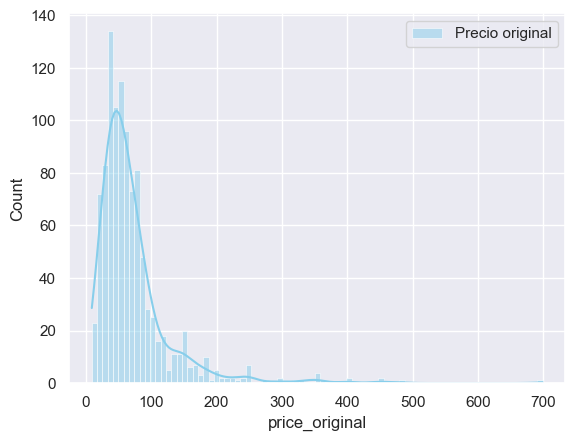

In [158]:
sns.set_theme(style="darkgrid")
sns.histplot(data=df_alquileres, x="price_original", color="skyblue", label="Precio original", kde=True)

plt.legend() 
plt.show()

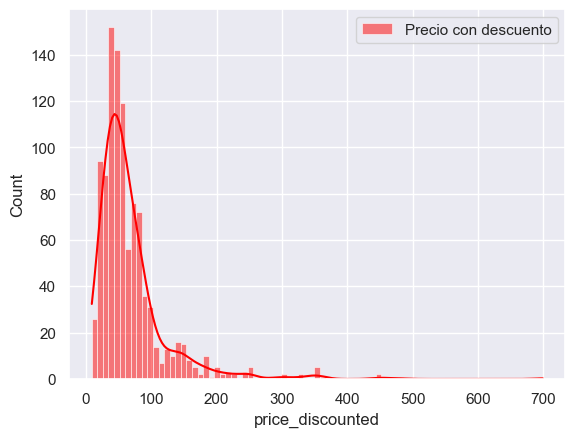

In [159]:
sns.set_theme(style="darkgrid")

sns.histplot(data=df_alquileres, x="price_discounted", color="red", label="Precio con descuento", kde=True)
plt.legend() 
plt.show()

* ¿Observa alguna diferencia?

Observamos que la proporcion de los precios es similar, lo que hay de diferente entre los precios originales y los que tienen descuento es que el maximo es diferente. Lo cual es logico.

**<h1>5. Discretización de precios</h1>**

In [160]:
df_alquileres['price_original'].describe()

count       1028.0
mean     71.090467
std      58.885053
min            9.0
25%           39.0
50%           56.0
75%           80.0
max          699.0
Name: price_original, dtype: Float64

En base a lo observado, tomamo como ancho un bin de 250

In [161]:
df_alquileres['price_category']=np.where(
    df_alquileres['price_original']<250,'bajo',np.where(
        ((df_alquileres['price_original']>=250) & (df_alquileres['price_original']<500)),'medio','alto'
    )
)

In [162]:
df_alquileres['price_category'].unique()

array(['bajo', 'medio', 'alto'], dtype=object)

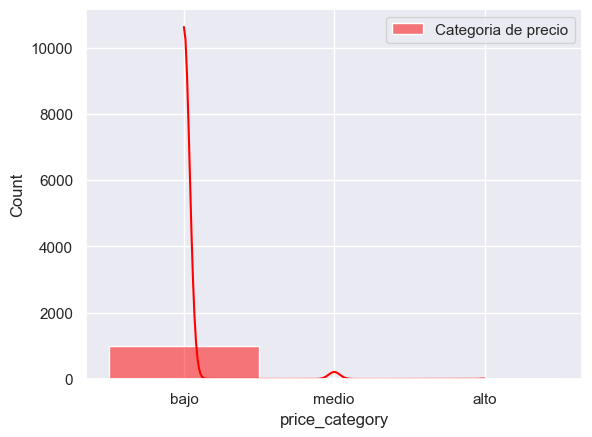

In [163]:
sns.set_theme(style="darkgrid")

sns.histplot(data=df_alquileres, x="price_category", color="red", label="Categoria de precio", kde=True)
plt.legend() 
plt.show()

<Axes: xlabel='price_category', ylabel='price_original'>

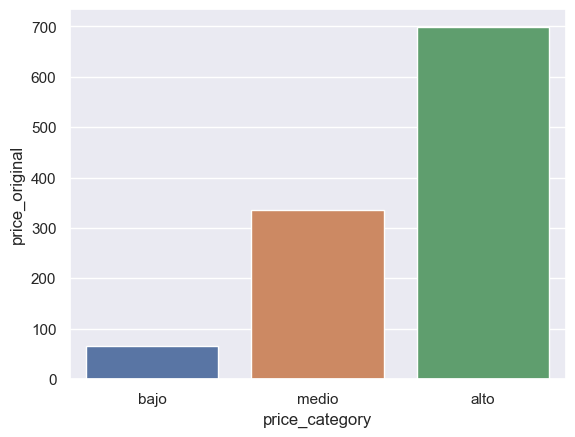

In [164]:
sns.barplot(x="price_category", y="price_original", hue="price_category", data=df_alquileres, errorbar=None)

**<h1>6. Análisis por provincia</h1>**

* ¿Cuántos alquileres con descuento hay por provincia?

In [175]:
# Cantidad de alquileres con descuentos por provincia
mask = df_alquileres['discounted']
df_alquileres[mask].groupby(by='provincia', observed=True).agg(
    cant_alquileres_con_descuento=('discounted', 'sum')
).reset_index().sort_values(by='cant_alquileres_con_descuento', ascending = False)

,provincia,cant_alquileres_con_descuento
3,TIERRA DEL FUEGO,63
2,RIO NEGRO,46
0,CHUBUT,45
1,NEUQUEN,37


* De cada provincia: ¿Cuál es el alquiler más caro? ¿Y el más barato?.

In [176]:
# Alquiler mas barato y mas caro de cada localidad
df_alquileres.groupby(by='provincia', observed=True).agg(
    alquiler_mas_caro=('price_discounted', 'max'),
    alquiler_mas_barato=('price_discounted', 'min')
    
).reset_index().sort_values(by='alquiler_mas_caro', ascending=False)

,provincia,alquiler_mas_caro,alquiler_mas_barato
2,RIO NEGRO,699,20
3,TIERRA DEL FUEGO,480,12
0,CHUBUT,350,10
1,NEUQUEN,220,9


* ¿Qué provincia tiene más publicaciones con descuento?

In [177]:
# Cantidad de alquileres con descuentos por provincia
mask = df_alquileres['discounted']
df_alquileres[mask].groupby(by='provincia', observed=True).agg(
    cant_publicaciones_con_descuento=('discounted', 'sum')
).reset_index().sort_values(by='cant_publicaciones_con_descuento', ascending=False).head(1)

,provincia,cant_publicaciones_con_descuento
3,TIERRA DEL FUEGO,63


*  ¿En qué ciudad se encuentra el precio más caro? ¿Y el más barato?

In [180]:
df_alquileres.groupby(by='city', observed=True).agg(
    alquiler_mas_caro=('price_discounted', 'max'),
    alquiler_mas_barato=('price_discounted', 'min')

).reset_index().sort_values(by='alquiler_mas_caro', ascending=False).head(1)

,city,alquiler_mas_caro,alquiler_mas_barato
57,SAN CARLOS DE BARILOCHE,699,21


In [182]:
df_alquileres.groupby(by='city', observed=True).agg(
    alquiler_mas_caro=('price_discounted', 'max'),
    alquiler_mas_barato=('price_discounted', 'min')

).reset_index().sort_values(by='alquiler_mas_barato', ascending=True).head(2)

,city,alquiler_mas_caro,alquiler_mas_barato
45,NEUQUEN,220,9
14,CIPOLLETTI,180,9


* Por último, realice 2 gráficos de cajas (boxplots) mostrando en uno la distribución de
* precios originales por provincia, y en otro la distribución de ratings por provincia

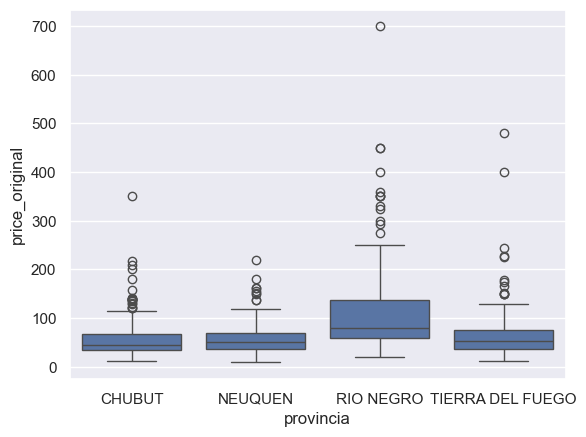

In [184]:
box_precios_originales = sns.boxplot(y='price_original', x='provincia', data=df_alquileres)

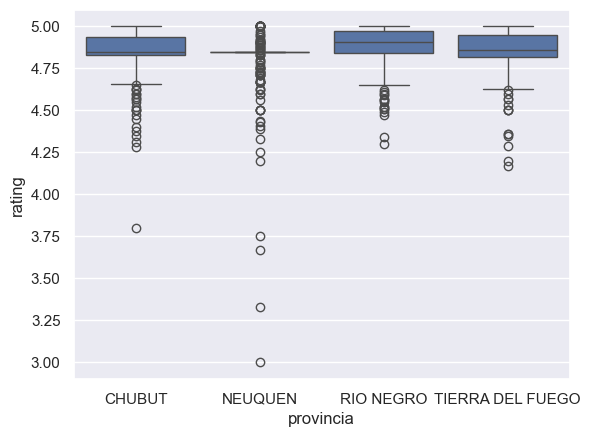

In [185]:
box_ratings = sns.boxplot(y='rating', x='provincia', data=df_alquileres)

**<h1>7. Características del alojamiento</h1>**

* Grafico de barras para baños

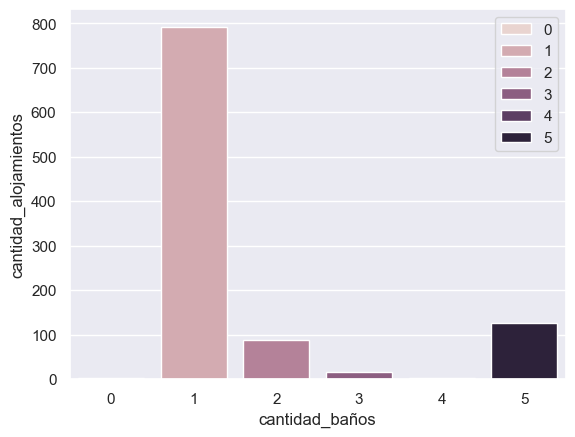

In [199]:
df_baños= df_alquileres.groupby('baño').agg(
    cantidad_alojamientos=('id_alojamiento','count')
).reset_index()
df_baños.rename(columns={'baño':'cantidad_baños'},inplace=True)


sns.set_theme(style="darkgrid")
sns.barplot(data=df_baños, x="cantidad_baños",y='cantidad_alojamientos',hue='cantidad_baños',  errorbar=None)

plt.legend()
plt.show()

* Grafico de barras para dormitorios

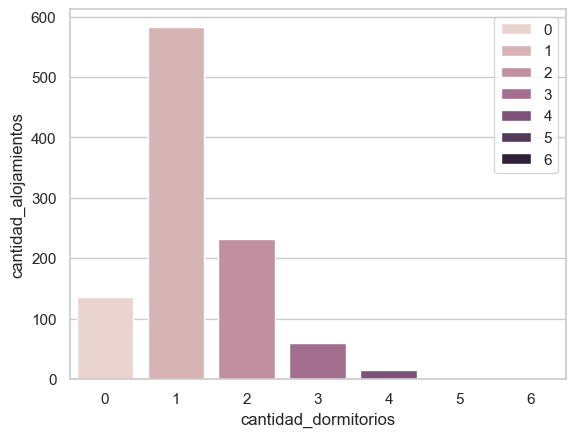

In [203]:
df_dormitorios = df_alquileres.groupby('dormitorio').agg(
    cantidad_alojamientos=('id_alojamiento', 'count')
).reset_index()
df_dormitorios.rename(columns={'dormitorio': 'cantidad_dormitorios'}, inplace=True)
df_dormitorios['cantidad_dormitorios'] = df_dormitorios['cantidad_dormitorios'].astype('int')

sns.set_theme(style="whitegrid")
sns.barplot(data=df_dormitorios, x="cantidad_dormitorios",
            y='cantidad_alojamientos', hue='cantidad_dormitorios',  errorbar=None)

plt.legend()
plt.show()

* Grafico de barras para camas

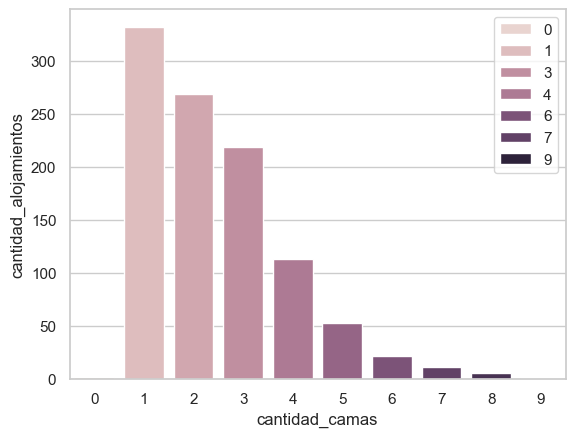

In [205]:
df_camas = df_alquileres.groupby('cama').agg(
    cantidad_alojamientos=('id_alojamiento', 'count')
).reset_index()
df_camas.rename(
    columns={'cama': 'cantidad_camas'}, inplace=True)
df_camas['cantidad_camas'] = df_camas['cantidad_camas'].astype(
    'int')

sns.set_theme(style="whitegrid")
sns.barplot(data=df_camas, x="cantidad_camas",
            y='cantidad_alojamientos', hue='cantidad_camas',  errorbar=None)

plt.legend()
plt.show()

**<h1>8. Detección de outliers</h1>**

**<h1>9. Análisis estacional y de duración</h1>**

* Analizar si existe una variación estacional en los precios agrupando por mes de check_in.
* Mostrar esta variación en un gráfico de barras. Considerando la región de la Argentina de
* donde se tomaron los datos, ¿le parece que tienen sentido esos resultados?

In [206]:
# Agregamos una columna mes, basada en check_in
df_alquileres['mes'] = df_alquileres['check_in'].dt.month

In [211]:
df_mes=df_alquileres.groupby(by='mes').agg(
    promedio_precios_por_mes=('price_discounted','mean')
)
pd.options.display.float_format = '{:,.2f}'.format
df_mes.reset_index()

,mes,promedio_precios_por_mes
0,1,48.33
1,2,65.00
2,3,36.00
3,4,45.00
4,5,20.00
5,7,64.27
6,8,84.65
7,9,93.41
8,10,55.32
9,11,53.00


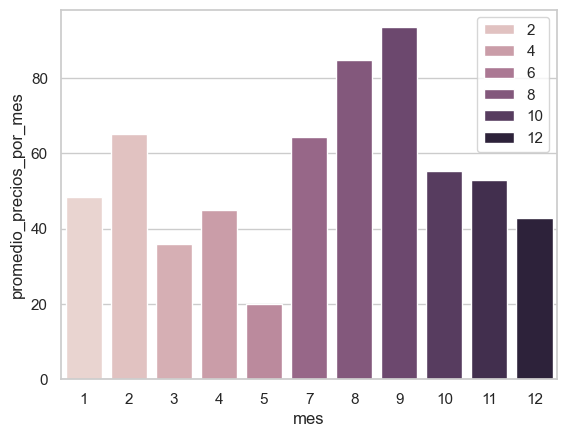

In [212]:
sns.set_theme(style="whitegrid")
sns.barplot(data=df_mes, x="mes",
            y='promedio_precios_por_mes', hue='mes',  errorbar=None)

plt.legend()
plt.show()

* Estos resultados tienen sentido, porque serian los meses de mayo nieve. Sube el turismo

* Duración de las estancias. Calcular la duración de cada estancia utilizando las columnas
* check_in y check_out. Crear una nueva columna stay_duration que contenga la duración en días.
* ¿Existe alguna relación entre la duración de la estancia y el precio del alojamiento? 
* Graficar esta ambas variables en un scatter plot y comentar lo observado

In [213]:
# Dias de estadias
df_alquileres['stay_duration'] = (df_alquileres['check_out'] - df_alquileres['check_in']).dt.days

<Axes: xlabel='stay_duration', ylabel='price_discounted'>

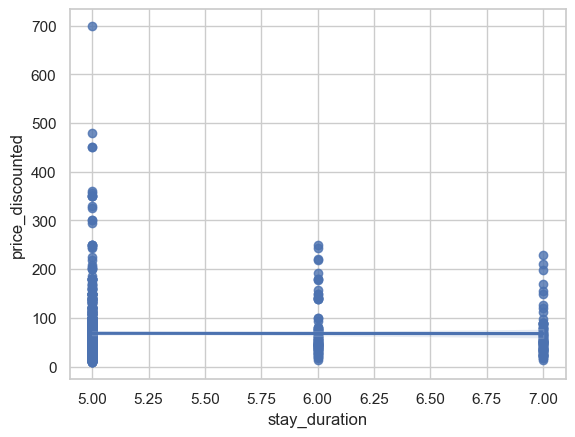

In [215]:
sns.regplot(data=df_alquileres[['stay_duration', 'price_discounted']],
            x="stay_duration", y="price_discounted", fit_reg=True)


* No pareciera haber una relacion directa.
* Lo que si vemos, que hay mas alojamientos para los 5 dias, con mucha variacion de precios a que si consideramos una estadia de 6 o 7.
* Se podria decir que a mayor estadia mayor estabilidad de precios y mas baratos en relacion a la estadia.